#### Date: 12th June 2019
#### Environment: Python 2.7.11 and Jupyter notebook

## Task 1: Data Integration

### Introduction

There were several dataset files which were needed to be integrated in order to produce the final schema. I've integrated and compared several columns in order to produce the final schema. The order of the data integration is as follows:
1. Getting the suburb by intergrating it with vic_suburb_boundary.zip folder.
2. Getting the crime average for crime type A, B and C by integrating the councils.txt file
   to get the local government area then integrating it with the Crimebylocation.xlsx file.
3. Getting to know whether the properties are overpriced by comparing it with the median price    (no integration of dataset was needed here)
4. Getting the closest train station id by integrating it with the gfts folder.
5. Getting the distance to the train staion
5. Getting the travel minute to CBD

### 1. Import libraries

In [3]:
import geopandas as gpd
import pandas as pd
import fiona
import shapely.geometry
from shapely.geometry.polygon import Polygon
from shapely.geometry import MultiPoint, Point, Polygon,shape
from shapely.geometry.polygon import Polygon
from math import radians, cos, sin, asin, sqrt,atan2
import numpy as np
import re

### 2. Suburb

For the suburb section, I have integrated both my csv file and the file VIC_LOCALITY_POLYGON_shp.shx which is in the vic_suburb_boundary.zip folder. The key for this part was to check if the latitude and longitude of the houses in my csv file is within the boundary of the geometry list which contains the suburb boundary given in the vic_suburb_boundary file. If it is within the boundary of the suburb given, I would extract the name of the suburb column given in VIC_LOCA_2. The extracted suburb is then placed into the new suburb column. 



In [4]:
shp1  = gpd.GeoDataFrame.from_file(u"VIC_LOCALITY_POLYGON_shp.shx")

In [5]:
shp1.head()

,LC_PLY_PID,DT_CREATE,DT_RETIRE,LOC_PID,VIC_LOCALI,VIC_LOCA_1,VIC_LOCA_2,VIC_LOCA_3,VIC_LOCA_4,VIC_LOCA_5,VIC_LOCA_6,VIC_LOCA_7,geometry
0,6670,2011-08-31,None,VIC2615,2012-04-27,None,UNDERBOOL,None,None,G,None,2,"POLYGON ((141.74552399 -35.07228701, 141.74552..."
1,6671,2011-08-31,None,VIC1986,2012-04-27,None,NURRAN,None,None,G,None,2,"POLYGON ((148.668767 -37.39571245, 148.6687620..."
2,6672,2011-08-31,None,VIC2862,2012-04-27,None,WOORNDOO,None,None,G,None,2,"POLYGON ((142.92287999 -37.97885997, 142.90449..."
3,6673,2011-08-31,None,VIC734,2017-08-09,None,DEPTFORD,None,None,G,None,2,"POLYGON ((147.82335712 -37.66000897, 147.82312..."
4,6674,2011-08-31,None,VIC2900,2012-04-27,None,YANAC,None,None,G,None,2,"POLYGON ((141.279783 -35.99858911, 141.2798853..."


In [6]:
houses = pd.read_csv('suburb.csv')
houses

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude
0,ID614482527,18 Curzon St,4,h,1720000.0,22/05/2016,2.0,2.0,676.0,22.0,-37.91980,145.01370
1,ID589318133,49 Warmington Rd,3,h,451000.0,30/07/2016,1.0,6.0,655.0,41.0,-37.80220,144.82350
2,ID627542223,44 Alexander St,3,h,1075000.0,8/10/2016,2.0,1.0,306.0,119.0,-37.80380,144.88960
3,ID175262550,23 Dean St,4,h,1260000.0,14/05/2016,3.0,2.0,654.0,69.0,-37.73650,145.01730
4,ID732976386,16 Waratah St,3,t,1260000.0,29/07/2017,2.0,2.0,669.0,59.0,-37.91289,145.08065
5,ID761015800,23 Galilee Cr,3,h,705000.0,8/07/2017,2.0,2.0,840.0,49.0,-37.67391,145.06180
6,ID246773550,338 Separation St,2,t,701000.0,17/09/2016,1.0,1.0,0.0,19.0,-37.77110,145.01300
7,ID286059563,9 Bendigo St,2,h,920000.0,11/03/2017,1.0,2.0,650.0,69.0,-37.72380,144.93840
8,ID450824850,4 Bennett St,3,h,1390000.0,3/12/2016,1.0,2.0,697.0,79.0,-37.85100,145.11690
9,ID795959586,25 Garnet St,5,h,1300000.0,16/07/2016,2.0,2.0,616.0,69.0,-37.74970,144.88670


In [7]:
houses['latlong'] = houses.Lattitude.astype(str) + ' ,'+ houses.Longtitude.astype(str)

In [8]:
# splitting based on comma
numbers=[tuple(vals.split(',')) for vals in houses['latlong']]
# converting to float number and in tuple
houses['latlong']=[tuple([float(num[1]),float(num[0])])for num in numbers]

In [9]:
t=houses['latlong'][0]
t

(145.0137, -37.9198)

In [10]:
houses.head(1)

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,latlong
0,ID614482527,18 Curzon St,4,h,1720000.0,22/05/2016,2.0,2.0,676.0,22.0,-37.9198,145.0137,"(145.0137, -37.9198)"


In [11]:
suburbs=[]
for tup in houses['latlong']:
    #converting to point
    point=Point(tup)
    for feat in fiona.open('VIC_LOCALITY_POLYGON_shp.shx'): 
        #taking all coordinates and mapping as polygon
        polygon=Polygon(feat['geometry']['coordinates'][0])
        if(polygon.contains(point)):
            suburbs.append(feat['properties']['VIC_LOCA_2'])
            break
            
            
#https://gis.stackexchange.com/questions/250172/finding-out-if-coordinate-is-within-shapefile-shp-using-pyshp

In [12]:
houses['Suburb']=suburbs
houses['Suburb']

0        BRIGHTON EAST
1        SUNSHINE WEST
2               SEDDON
3              PRESTON
4       BENTLEIGH EAST
5            MILL PARK
6            NORTHCOTE
7          PASCOE VALE
8              BURWOOD
9        ESSENDON WEST
10            SUNSHINE
11           CHADSTONE
12           DONCASTER
13           MAIDSTONE
14           RESERVOIR
15             PRAHRAN
16           FOOTSCRAY
17       FITZROY NORTH
18           MAIDSTONE
19              TOORAK
20             FAWKNER
21            HAWTHORN
22         TEMPLESTOWE
23            WATSONIA
24              COBURG
25            CARNEGIE
26         PASCOE VALE
27           DONCASTER
28             BERWICK
29             MENTONE
            ...       
690           CREMORNE
691              LALOR
692          BENTLEIGH
693           HAWTHORN
694             HALLAM
695         HUGHESDALE
696     BRUNSWICK WEST
697           OAK PARK
698       HAMPTON EAST
699          MELBOURNE
700        ELSTERNWICK
701           VIEWBANK
702      CL

In [13]:
houses.head(1)

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,latlong,Suburb
0,ID614482527,18 Curzon St,4,h,1720000.0,22/05/2016,2.0,2.0,676.0,22.0,-37.9198,145.0137,"(145.0137, -37.9198)",BRIGHTON EAST


In [14]:
houses.drop('latlong',axis =1, inplace = True)

In [15]:
# check for duplicated rows
p = houses[houses.duplicated(['ID'], keep=False)]
p

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb
7,ID286059563,9 Bendigo St,2,h,920000.0,11/03/2017,1.0,2.0,650.0,69.0,-37.72380,144.93840,PASCOE VALE
19,ID538616172,2/635 Malvern Rd,2,u,876000.0,4/03/2017,1.0,1.0,649.0,84.0,-37.84860,145.00800,TOORAK
63,ID246542583,48 McMillan St,4,h,962000.0,15/07/2017,2.0,4.0,724.0,19.0,-37.93197,145.12219,CLAYTON SOUTH
74,ID571803316,2/100 Commercial Rd,3,u,805000.0,17/09/2016,2.0,3.0,6111.0,6.0,-37.84530,144.98490,SOUTH YARRA
75,ID247256243,31 Gladstone Av,3,h,1335000.0,22/07/2017,1.0,1.0,390.0,99.0,-37.76588,144.99731,NORTHCOTE
79,ID631915383,23/4 Wests Rd,3,h,456000.0,18/03/2017,2.0,2.0,4977.0,14.0,-37.77370,144.88160,MARIBYRNONG
94,ID229799831,6 Hardwick St,3,h,967000.0,25/02/2017,1.0,1.0,169.0,34.0,-37.74940,144.96810,COBURG
139,ID631915383,23/4 Wests Rd,3,h,456000.0,18/03/2017,2.0,2.0,4977.0,14.0,-37.77370,144.88160,MARIBYRNONG
159,ID229799831,6 Hardwick St,3,h,967000.0,25/02/2017,1.0,1.0,169.0,34.0,-37.74940,144.96810,COBURG
165,ID623716890,122 Victoria Rd,5,h,2775000.0,22/05/2016,3.0,2.0,864.0,64.0,-37.82310,145.05350,HAWTHORN EAST


In [16]:
houses.shape

(720, 13)

In [17]:
# dropping duplicates
houses.drop_duplicates(subset= 'ID', keep= 'first', inplace= True)

In [18]:
houses.shape

(673, 13)

In [19]:
houses

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb
0,ID614482527,18 Curzon St,4,h,1720000.0,22/05/2016,2.0,2.0,676.0,22.0,-37.91980,145.01370,BRIGHTON EAST
1,ID589318133,49 Warmington Rd,3,h,451000.0,30/07/2016,1.0,6.0,655.0,41.0,-37.80220,144.82350,SUNSHINE WEST
2,ID627542223,44 Alexander St,3,h,1075000.0,8/10/2016,2.0,1.0,306.0,119.0,-37.80380,144.88960,SEDDON
3,ID175262550,23 Dean St,4,h,1260000.0,14/05/2016,3.0,2.0,654.0,69.0,-37.73650,145.01730,PRESTON
4,ID732976386,16 Waratah St,3,t,1260000.0,29/07/2017,2.0,2.0,669.0,59.0,-37.91289,145.08065,BENTLEIGH EAST
5,ID761015800,23 Galilee Cr,3,h,705000.0,8/07/2017,2.0,2.0,840.0,49.0,-37.67391,145.06180,MILL PARK
6,ID246773550,338 Separation St,2,t,701000.0,17/09/2016,1.0,1.0,0.0,19.0,-37.77110,145.01300,NORTHCOTE
7,ID286059563,9 Bendigo St,2,h,920000.0,11/03/2017,1.0,2.0,650.0,69.0,-37.72380,144.93840,PASCOE VALE
8,ID450824850,4 Bennett St,3,h,1390000.0,3/12/2016,1.0,2.0,697.0,79.0,-37.85100,145.11690,BURWOOD
9,ID795959586,25 Garnet St,5,h,1300000.0,16/07/2016,2.0,2.0,616.0,69.0,-37.74970,144.88670,ESSENDON WEST


### 3.Crime Average for crime type A, B and C

In order to get the crime average based on the crime type, I've initially merged my house dataframe to councils.txt folder. This is to obtain the local government area for the suburbs that I have. After obtaining the local government area, I've created a new column in my house dataframe for easy comparison with the crimebylocationdatatable excel file. Then I've calculated the average for the average for crime type A, B and C of my suburbs list for the 3 years.



In [20]:
uppercase_govarea = []
with open("councils.txt", "r") as mytxt:
    for lines in mytxt: 
        uppercase_govarea.append(lines.upper())

In [21]:
uppercase_govarea[0]

"BANYULE : ['ABBOTSFORD', 'AIRPORT WEST', 'ALBERT PARK', 'ALPHINGTON']\n"

In [22]:
split_govarea = []
for i in uppercase_govarea:
    split_govarea.append(i.split(':'))

In [23]:
split_govarea

[['BANYULE ',
  " ['ABBOTSFORD', 'AIRPORT WEST', 'ALBERT PARK', 'ALPHINGTON']\n"],
 ['BRIMBANK ', " ['ALTONA', 'ALTONA NORTH', 'ARMADALE', 'ASCOT VALE']\n"],
 ['DAREBIN ', " ['ASHBURTON', 'ASHWOOD', 'AVONDALE HEIGHTS', 'BALACLAVA']\n"],
 ['HOBSONS BAY ',
  " ['BALWYN', 'BALWYN NORTH', 'BENTLEIGH', 'BENTLEIGH EAST']\n"],
 ['HUME ', " ['BOX HILL', 'BRAYBROOK', 'BRIGHTON', 'BRIGHTON EAST']\n"],
 ['MARIBYRNONG ', " ['BRUNSWICK', 'BRUNSWICK WEST', 'BULLEEN', 'BURWOOD']\n"],
 ['MELBOURNE ',
  " ['CAMBERWELL', 'CANTERBURY', 'CARLTON NORTH', 'CARNEGIE']\n"],
 ['MELTON ',
  " ['CAULFIELD', 'CAULFIELD NORTH', 'CAULFIELD SOUTH', 'CHADSTONE']\n"],
 ['MOONEE VALLEY ',
  " ['CLIFTON HILL', 'COBURG', 'COBURG NORTH', 'COLLINGWOOD']\n"],
 ['MORELAND ', " ['DONCASTER', 'EAGLEMONT', 'ELSTERNWICK', 'ELWOOD']\n"],
 ['NILLUMBIK ', " ['ESSENDON', 'ESSENDON NORTH', 'FAIRFIELD', 'FITZROY']\n"],
 ['WHITTLESEA ',
  " ['FITZROY NORTH', 'FLEMINGTON', 'FOOTSCRAY', 'GLEN IRIS']\n"],
 ['WYNDHAM ', " ['GLENROY', 'GOWA

In [24]:
# getting government area
gov_area = []
for i in range(len(split_govarea)):
    gov_area.append(split_govarea[i][0])
gov_area

['BANYULE ',
 'BRIMBANK ',
 'DAREBIN ',
 'HOBSONS BAY ',
 'HUME ',
 'MARIBYRNONG ',
 'MELBOURNE ',
 'MELTON ',
 'MOONEE VALLEY ',
 'MORELAND ',
 'NILLUMBIK ',
 'WHITTLESEA ',
 'WYNDHAM ',
 'YARRA ',
 'BASS COAST ',
 'SOUTH GIPPSLAND ',
 'BAW BAW ',
 'BENALLA ',
 'MANSFIELD ',
 'MURRINDINDI ',
 'BOROONDARA ',
 'EAST GIPPSLAND ',
 'GREATER SHEPPARTON ',
 'KNOX ',
 'LATROBE ',
 'MANNINGHAM ',
 'MAROONDAH ',
 'MITCHELL ',
 'STRATHBOGIE ',
 'MONASH ',
 'ALPINE ',
 'MOIRA ',
 'WANGARATTA ',
 'WELLINGTON ',
 'WHITEHORSE ',
 'INDIGO ',
 'TOWONG ',
 'WODONGA ',
 'YARRA RANGES ',
 'CARDINIA ',
 'CASEY ',
 'FRANKSTON ',
 'BAYSIDE ',
 'GLEN EIRA ',
 'GREATER DANDENONG ',
 'KINGSTON ',
 'MORNINGTON PENINSULA ',
 'PORT PHILLIP ',
 'STONNINGTON ',
 'BALLARAT ',
 'PYRENEES ',
 'GREATER BENDIGO ',
 'CAMPASPE ',
 'CENTRAL GOLDFIELDS ',
 'LODDON ',
 'GREATER GEELONG ',
 'QUEENSCLIFFE ',
 'HINDMARSH ',
 'HORSHAM ',
 'WEST WIMMERA ',
 'MACEDON RANGES ',
 'MOUNT ALEXANDER ',
 'MILDURA ',
 'GOLDEN PLAINS ',


In [25]:
# getting suburbs
suburbs = []
for i in range(len(split_govarea)):
    suburbs.append(split_govarea[i][1])
suburbs

[" ['ABBOTSFORD', 'AIRPORT WEST', 'ALBERT PARK', 'ALPHINGTON']\n",
 " ['ALTONA', 'ALTONA NORTH', 'ARMADALE', 'ASCOT VALE']\n",
 " ['ASHBURTON', 'ASHWOOD', 'AVONDALE HEIGHTS', 'BALACLAVA']\n",
 " ['BALWYN', 'BALWYN NORTH', 'BENTLEIGH', 'BENTLEIGH EAST']\n",
 " ['BOX HILL', 'BRAYBROOK', 'BRIGHTON', 'BRIGHTON EAST']\n",
 " ['BRUNSWICK', 'BRUNSWICK WEST', 'BULLEEN', 'BURWOOD']\n",
 " ['CAMBERWELL', 'CANTERBURY', 'CARLTON NORTH', 'CARNEGIE']\n",
 " ['CAULFIELD', 'CAULFIELD NORTH', 'CAULFIELD SOUTH', 'CHADSTONE']\n",
 " ['CLIFTON HILL', 'COBURG', 'COBURG NORTH', 'COLLINGWOOD']\n",
 " ['DONCASTER', 'EAGLEMONT', 'ELSTERNWICK', 'ELWOOD']\n",
 " ['ESSENDON', 'ESSENDON NORTH', 'FAIRFIELD', 'FITZROY']\n",
 " ['FITZROY NORTH', 'FLEMINGTON', 'FOOTSCRAY', 'GLEN IRIS']\n",
 " ['GLENROY', 'GOWANBRAE', 'HADFIELD', 'HAMPTON']\n",
 " ['HAMPTON EAST', 'HAWTHORN', 'HEIDELBERG HEIGHTS', 'HEIDELBERG WEST']\n",
 " ['HUGHESDALE', 'IVANHOE', 'KEALBA', 'KEILOR EAST']\n",
 " ['KENSINGTON', 'KEW', 'KEW EAST', 'KOOY

In [26]:
# putting it into a dataframe so its easier to match later on with housing dataframe
df = pd.DataFrame(columns=['Gov_area', 'Suburb'])
df['Suburb'] = suburbs
df['Gov_area'] = gov_area

In [27]:
df

,Gov_area,Suburb
0,BANYULE,"['ABBOTSFORD', 'AIRPORT WEST', 'ALBERT PARK',..."
1,BRIMBANK,"['ALTONA', 'ALTONA NORTH', 'ARMADALE', 'ASCOT..."
2,DAREBIN,"['ASHBURTON', 'ASHWOOD', 'AVONDALE HEIGHTS', ..."
3,HOBSONS BAY,"['BALWYN', 'BALWYN NORTH', 'BENTLEIGH', 'BENT..."
4,HUME,"['BOX HILL', 'BRAYBROOK', 'BRIGHTON', 'BRIGHT..."
5,MARIBYRNONG,"['BRUNSWICK', 'BRUNSWICK WEST', 'BULLEEN', 'B..."
6,MELBOURNE,"['CAMBERWELL', 'CANTERBURY', 'CARLTON NORTH',..."
7,MELTON,"['CAULFIELD', 'CAULFIELD NORTH', 'CAULFIELD S..."
8,MOONEE VALLEY,"['CLIFTON HILL', 'COBURG', 'COBURG NORTH', 'C..."
9,MORELAND,"['DONCASTER', 'EAGLEMONT', 'ELSTERNWICK', 'EL..."


In [28]:
# removing unwanted symbols
df['Suburb'] = suburbs
suburbs1 = df['Suburb'][1]

suburbs_re = re.sub('\[|\]|\\n|','',suburbs1)
suburbs_re

" 'ALTONA', 'ALTONA NORTH', 'ARMADALE', 'ASCOT VALE'"

In [29]:
# splitting the list of suburbs and putting them individually into one column instead of 
# having them into a whole list in a column
df_suburbs = pd.DataFrame(df.Suburb.str.split(',').tolist(), index=df.Gov_area).stack()
df_suburbs = df_suburbs.reset_index()[[0, 'Gov_area']] # var1 variable is currently labeled 0
df_suburbs.columns = ['Suburb', 'Gov_area']

#https://stackoverflow.com/questions/12680754/split-explode-pandas-dataframe-string-entry-to-separate-rows

In [30]:
df_suburbs

,Suburb,Gov_area
0,['ABBOTSFORD',BANYULE
1,'AIRPORT WEST',BANYULE
2,'ALBERT PARK',BANYULE
3,'ALPHINGTON']\n,BANYULE
4,['ALTONA',BRIMBANK
5,'ALTONA NORTH',BRIMBANK
6,'ARMADALE',BRIMBANK
7,'ASCOT VALE']\n,BRIMBANK
8,['ASHBURTON',DAREBIN
9,'ASHWOOD',DAREBIN


In [31]:
# replacing unwanted symbol [ with empty space
df_suburbs['Suburb'] = df_suburbs['Suburb'].str.replace("[","")
df_suburbs.head()


,Suburb,Gov_area
0,'ABBOTSFORD',BANYULE
1,'AIRPORT WEST',BANYULE
2,'ALBERT PARK',BANYULE
3,'ALPHINGTON']\n,BANYULE
4,'ALTONA',BRIMBANK


In [32]:
# replacing unwanted symbol \n with empty space
df_suburbs['Suburb'] = df_suburbs['Suburb'].str.replace("\n","")
df_suburbs.head()


,Suburb,Gov_area
0,'ABBOTSFORD',BANYULE
1,'AIRPORT WEST',BANYULE
2,'ALBERT PARK',BANYULE
3,'ALPHINGTON'],BANYULE
4,'ALTONA',BRIMBANK


In [33]:
# replacing unwanted symbol ], ' with empty space
df_suburbs['Suburb'] = df_suburbs['Suburb'].str.replace("]","")
df_suburbs['Suburb'] = df_suburbs['Suburb'].str.replace("'","")
df_suburbs['Suburb'] = df_suburbs['Suburb'].str.strip()
df_suburbs


,Suburb,Gov_area
0,ABBOTSFORD,BANYULE
1,AIRPORT WEST,BANYULE
2,ALBERT PARK,BANYULE
3,ALPHINGTON,BANYULE
4,ALTONA,BRIMBANK
5,ALTONA NORTH,BRIMBANK
6,ARMADALE,BRIMBANK
7,ASCOT VALE,BRIMBANK
8,ASHBURTON,DAREBIN
9,ASHWOOD,DAREBIN


In [34]:
# merging with suburbs dataframe to get gov_area
merged = houses.merge(df_suburbs,how = 'left',left_on ='Suburb',right_on='Suburb')

merged

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,Gov_area
0,ID614482527,18 Curzon St,4,h,1720000.0,22/05/2016,2.0,2.0,676.0,22.0,-37.91980,145.01370,BRIGHTON EAST,HUME
1,ID589318133,49 Warmington Rd,3,h,451000.0,30/07/2016,1.0,6.0,655.0,41.0,-37.80220,144.82350,SUNSHINE WEST,LATROBE
2,ID627542223,44 Alexander St,3,h,1075000.0,8/10/2016,2.0,1.0,306.0,119.0,-37.80380,144.88960,SEDDON,EAST GIPPSLAND
3,ID175262550,23 Dean St,4,h,1260000.0,14/05/2016,3.0,2.0,654.0,69.0,-37.73650,145.01730,PRESTON,BOROONDARA
4,ID732976386,16 Waratah St,3,t,1260000.0,29/07/2017,2.0,2.0,669.0,59.0,-37.91289,145.08065,BENTLEIGH EAST,HOBSONS BAY
5,ID761015800,23 Galilee Cr,3,h,705000.0,8/07/2017,2.0,2.0,840.0,49.0,-37.67391,145.06180,MILL PARK,MORNINGTON PENINSULA
6,ID246773550,338 Separation St,2,t,701000.0,17/09/2016,1.0,1.0,0.0,19.0,-37.77110,145.01300,NORTHCOTE,MURRINDINDI
7,ID286059563,9 Bendigo St,2,h,920000.0,11/03/2017,1.0,2.0,650.0,69.0,-37.72380,144.93840,PASCOE VALE,BOROONDARA
8,ID450824850,4 Bennett St,3,h,1390000.0,3/12/2016,1.0,2.0,697.0,79.0,-37.85100,145.11690,BURWOOD,MARIBYRNONG
9,ID795959586,25 Garnet St,5,h,1300000.0,16/07/2016,2.0,2.0,616.0,69.0,-37.74970,144.88670,ESSENDON WEST,MONASH


In [35]:
# reading crime by location file 
xls = pd.ExcelFile('crimebylocationdatatable-yearending31march2016.xlsx')
df1 = pd.read_excel(xls, 'Contents')
df2 = pd.read_excel(xls, 'Table 1')

In [36]:
# only reading the second tab which is essential
df2

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,Table 1. Number of offences by geographic area...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df2.drop(axis =1 , columns = 'Unnamed: 0', inplace = True )

In [38]:
# dropping columns 0-16 as they are all Nan and irrelevant
df2.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], inplace=True)
df2

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
17,Apr - Mar reference period,Police Region,Police Service Area,Local Government Area,CSA Offence Division,CSA Offence Subdivision,Offence Count,LGA ERP,Victorian ERP
18,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A10 Homicide and related offences,4,123600,5632521
19,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A20 Assault and related offences,568,123600,5632521
20,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A30 Sexual offences,132,123600,5632521
21,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A40 Abduction and related offences,12,123600,5632521
22,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A50 Robbery,46,123600,5632521
23,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A60 Blackmail and extortion,2,123600,5632521
24,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,"A70 Stalking, harassment and threatening behav...",148,123600,5632521
25,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A80 Dangerous and negligent acts endangering p...,75,123600,5632521
26,2012,1 North West Metro,BANYULE,BANYULE,B Property and deception offences,B10 Arson,53,123600,5632521


In [39]:
# making the columns in position 0 to be the title
df2.columns=df2.iloc[0]
df2.columns

Index(['Apr - Mar reference period', 'Police Region', 'Police Service Area',
       'Local Government Area', 'CSA Offence Division',
       'CSA Offence Subdivision', 'Offence Count', 'LGA ERP', 'Victorian ERP'],
      dtype='object', name=17)

In [40]:
for i in range(18,len(df2)+17):
    if 'HUME' == df2['Local Government Area'][i]:
        print(i)

119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
5559
5560
5561
5562
5563
5564
5565
5566
5567
5568
5569
5570
5571
5572
5573
5574
5575
5576
5577
5578
5579
5580
5581
5582
5583
5584
7382
7383
7384
7385
7386
7387
7388
7389
7390
7391
7392
7393
7394
7395
7396
7397
7398
7399
7400
7401
7402
7403
7404
7405
7406


In [41]:
df2.head()

17,Apr - Mar reference period,Police Region,Police Service Area,Local Government Area,CSA Offence Division,CSA Offence Subdivision,Offence Count,LGA ERP,Victorian ERP
17,Apr - Mar reference period,Police Region,Police Service Area,Local Government Area,CSA Offence Division,CSA Offence Subdivision,Offence Count,LGA ERP,Victorian ERP
18,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A10 Homicide and related offences,4,123600,5632521
19,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A20 Assault and related offences,568,123600,5632521
20,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A30 Sexual offences,132,123600,5632521
21,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A40 Abduction and related offences,12,123600,5632521


In [42]:
df2['Crime_Code'] = i

In [43]:
# range is from 18 as index starts from 18 and len needs to be plus 17 to get the overall 
# length
for i in range(18,len(df2)+17):
    # creating an additional column to clasify the crime type
    if 'A' in df2['CSA Offence Division'][i]:
        df2['Crime_Code'][i]='A'
    elif 'B' in df2['CSA Offence Division'][i]:
        df2['Crime_Code'][i]='B'
    elif 'C' in df2['CSA Offence Division'][i]:
        df2['Crime_Code'][i]='C'
    
    
    

/Users/ngjadekuan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/ngjadekuan/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [44]:
df2

17,Apr - Mar reference period,Police Region,Police Service Area,Local Government Area,CSA Offence Division,CSA Offence Subdivision,Offence Count,LGA ERP,Victorian ERP,Crime_Code
17,Apr - Mar reference period,Police Region,Police Service Area,Local Government Area,CSA Offence Division,CSA Offence Subdivision,Offence Count,LGA ERP,Victorian ERP,9102
18,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A10 Homicide and related offences,4,123600,5632521,A
19,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A20 Assault and related offences,568,123600,5632521,A
20,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A30 Sexual offences,132,123600,5632521,A
21,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A40 Abduction and related offences,12,123600,5632521,A
22,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A50 Robbery,46,123600,5632521,A
23,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A60 Blackmail and extortion,2,123600,5632521,A
24,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,"A70 Stalking, harassment and threatening behav...",148,123600,5632521,A
25,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A80 Dangerous and negligent acts endangering p...,75,123600,5632521,A
26,2012,1 North West Metro,BANYULE,BANYULE,B Property and deception offences,B10 Arson,53,123600,5632521,B


In [45]:
merged.head()

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,Gov_area
0,ID614482527,18 Curzon St,4,h,1720000.0,22/05/2016,2.0,2.0,676.0,22.0,-37.91980,145.01370,BRIGHTON EAST,HUME
1,ID589318133,49 Warmington Rd,3,h,451000.0,30/07/2016,1.0,6.0,655.0,41.0,-37.80220,144.82350,SUNSHINE WEST,LATROBE
2,ID627542223,44 Alexander St,3,h,1075000.0,8/10/2016,2.0,1.0,306.0,119.0,-37.80380,144.88960,SEDDON,EAST GIPPSLAND
3,ID175262550,23 Dean St,4,h,1260000.0,14/05/2016,3.0,2.0,654.0,69.0,-37.73650,145.01730,PRESTON,BOROONDARA
4,ID732976386,16 Waratah St,3,t,1260000.0,29/07/2017,2.0,2.0,669.0,59.0,-37.91289,145.08065,BENTLEIGH EAST,HOBSONS BAY


In [46]:
# creating empty column
merged['Crime_A_avg']=0
merged['Crime_B_avg']=0
merged['Crime_C_avg']=0


In [47]:
merged['Gov_area'][0]

'HUME '

In [48]:
for i in range(0,len(merged)):
    A_sum=0
    B_sum=0
    C_sum=0
    # getting the year 
    year = int(merged['Date'][i].split('/')[-1])
    for j in range(18,len(df2)+17): 
      # checking if merged dataframe goverment area is in df2 local government area
        if merged['Gov_area'][i].strip() == df2['Local Government Area'][j].strip():
              # if so then if previous year is equal to the figure in the april march reference period
            if year-1 == int(df2['Apr - Mar reference period'][j]):
                  # if crime is A then add to sum
                if df2['Crime_Code'][j]=='A':
                    A_sum+=df2['Offence Count'][j]
                  #if crime is B then add to sum
                elif df2['Crime_Code'][j]=='B':
                    B_sum+=df2['Offence Count'][j]
                    # if crime is C then add to sum
                elif df2['Crime_Code'][j]=='C':
                    C_sum+=df2['Offence Count'][j]
              # if so then if previous 2 year is equal to the figure in the april march reference
            if year-2 == int(df2['Apr - Mar reference period'][j]):
                # if crime is A then add to sum
                if df2['Crime_Code'][j]=='A':
                    A_sum+=df2['Offence Count'][j]
                 # if crime is B then add to sum
                elif df2['Crime_Code'][j]=='B':
                    B_sum+=df2['Offence Count'][j]
                 # if crime is C then add to sum
                elif df2['Crime_Code'][j]=='C':
                    C_sum+=df2['Offence Count'][j]
             # if so then if previous 3 year is equal to the figure in the april march reference
            if year-3 == int(df2['Apr - Mar reference period'][j]):
                # if crime is A then add to sum
                if df2['Crime_Code'][j]=='A':
                    A_sum+=df2['Offence Count'][j]
               # if crime is B then add to sum
                elif df2['Crime_Code'][j]=='B':
               # if crime is C then add to sum
                    B_sum+=df2['Offence Count'][j]
                elif df2['Crime_Code'][j]=='C':
                    C_sum+=df2['Offence Count'][j]
    # getting the average by dividing sum by 3
    merged['Crime_A_avg'][i]=float(A_sum/3)
    merged['Crime_B_avg'][i]=float(B_sum/3)
    merged['Crime_C_avg'][i]=float(C_sum/3)
    
                    
                
    

/Users/ngjadekuan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ngjadekuan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ngjadekuan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [49]:
merged

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,Gov_area,Crime_A_avg,Crime_B_avg,Crime_C_avg
0,ID614482527,18 Curzon St,4,h,1720000.0,22/05/2016,2.0,2.0,676.0,22.0,-37.91980,145.01370,BRIGHTON EAST,HUME,2744,10289,780
1,ID589318133,49 Warmington Rd,3,h,451000.0,30/07/2016,1.0,6.0,655.0,41.0,-37.80220,144.82350,SUNSHINE WEST,LATROBE,2403,5212,586
2,ID627542223,44 Alexander St,3,h,1075000.0,8/10/2016,2.0,1.0,306.0,119.0,-37.80380,144.88960,SEDDON,EAST GIPPSLAND,824,1890,159
3,ID175262550,23 Dean St,4,h,1260000.0,14/05/2016,3.0,2.0,654.0,69.0,-37.73650,145.01730,PRESTON,BOROONDARA,659,5219,338
4,ID732976386,16 Waratah St,3,t,1260000.0,29/07/2017,2.0,2.0,669.0,59.0,-37.91289,145.08065,BENTLEIGH EAST,HOBSONS BAY,959,4476,324
5,ID761015800,23 Galilee Cr,3,h,705000.0,8/07/2017,2.0,2.0,840.0,49.0,-37.67391,145.06180,MILL PARK,MORNINGTON PENINSULA,1508,6073,553
6,ID246773550,338 Separation St,2,t,701000.0,17/09/2016,1.0,1.0,0.0,19.0,-37.77110,145.01300,NORTHCOTE,MURRINDINDI,136,302,42
7,ID286059563,9 Bendigo St,2,h,920000.0,11/03/2017,1.0,2.0,650.0,69.0,-37.72380,144.93840,PASCOE VALE,BOROONDARA,705,5479,335
8,ID450824850,4 Bennett St,3,h,1390000.0,3/12/2016,1.0,2.0,697.0,79.0,-37.85100,145.11690,BURWOOD,MARIBYRNONG,958,5673,628
9,ID795959586,25 Garnet St,5,h,1300000.0,16/07/2016,2.0,2.0,616.0,69.0,-37.74970,144.88670,ESSENDON WEST,MONASH,1144,6845,375


## 4. Overpriced

For overpriced, I've grouped the suburbs based on similiar features in terms of rooms, bathroom, car, type and year.
Based on the grouping, I've gotten the median price and compared the price values with the median price to determine
if it is overpriced.

In [50]:
# creating a year column for comparison
merged['year']=[merged['Date'][i].split('/')[-1] for i in range(len(merged))]
merged['over_priced']=-1
merged.head()

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,Gov_area,Crime_A_avg,Crime_B_avg,Crime_C_avg,year,over_priced
0,ID614482527,18 Curzon St,4,h,1720000.0,22/05/2016,2.0,2.0,676.0,22.0,-37.91980,145.01370,BRIGHTON EAST,HUME,2744,10289,780,2016,-1
1,ID589318133,49 Warmington Rd,3,h,451000.0,30/07/2016,1.0,6.0,655.0,41.0,-37.80220,144.82350,SUNSHINE WEST,LATROBE,2403,5212,586,2016,-1
2,ID627542223,44 Alexander St,3,h,1075000.0,8/10/2016,2.0,1.0,306.0,119.0,-37.80380,144.88960,SEDDON,EAST GIPPSLAND,824,1890,159,2016,-1
3,ID175262550,23 Dean St,4,h,1260000.0,14/05/2016,3.0,2.0,654.0,69.0,-37.73650,145.01730,PRESTON,BOROONDARA,659,5219,338,2016,-1
4,ID732976386,16 Waratah St,3,t,1260000.0,29/07/2017,2.0,2.0,669.0,59.0,-37.91289,145.08065,BENTLEIGH EAST,HOBSONS BAY,959,4476,324,2017,-1


In [51]:
# creating a separate dataframe for median value of price with index to compare against price
median_values=(merged.groupby(['Rooms','Bathroom','Car','Type','year'],as_index=False)['Price'].transform('median'))
# checking if above or below median price then assigning values
for i in range(len(merged)):
    if merged['Price'][i] > median_values['Price'][i]:
        merged['over_priced'][i]=1
    elif merged['Price'][i] < median_values['Price'][i]:
        merged['over_priced'][i]=0


/Users/ngjadekuan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/ngjadekuan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [52]:
median_values.head()

,Price
0,1252500.0
1,451000.0
2,1165000.0
3,1755000.0
4,951000.0


In [53]:
merged

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,Gov_area,Crime_A_avg,Crime_B_avg,Crime_C_avg,year,over_priced
0,ID614482527,18 Curzon St,4,h,1720000.0,22/05/2016,2.0,2.0,676.0,22.0,-37.91980,145.01370,BRIGHTON EAST,HUME,2744,10289,780,2016,1
1,ID589318133,49 Warmington Rd,3,h,451000.0,30/07/2016,1.0,6.0,655.0,41.0,-37.80220,144.82350,SUNSHINE WEST,LATROBE,2403,5212,586,2016,-1
2,ID627542223,44 Alexander St,3,h,1075000.0,8/10/2016,2.0,1.0,306.0,119.0,-37.80380,144.88960,SEDDON,EAST GIPPSLAND,824,1890,159,2016,0
3,ID175262550,23 Dean St,4,h,1260000.0,14/05/2016,3.0,2.0,654.0,69.0,-37.73650,145.01730,PRESTON,BOROONDARA,659,5219,338,2016,0
4,ID732976386,16 Waratah St,3,t,1260000.0,29/07/2017,2.0,2.0,669.0,59.0,-37.91289,145.08065,BENTLEIGH EAST,HOBSONS BAY,959,4476,324,2017,1
5,ID761015800,23 Galilee Cr,3,h,705000.0,8/07/2017,2.0,2.0,840.0,49.0,-37.67391,145.06180,MILL PARK,MORNINGTON PENINSULA,1508,6073,553,2017,0
6,ID246773550,338 Separation St,2,t,701000.0,17/09/2016,1.0,1.0,0.0,19.0,-37.77110,145.01300,NORTHCOTE,MURRINDINDI,136,302,42,2016,1
7,ID286059563,9 Bendigo St,2,h,920000.0,11/03/2017,1.0,2.0,650.0,69.0,-37.72380,144.93840,PASCOE VALE,BOROONDARA,705,5479,335,2017,0
8,ID450824850,4 Bennett St,3,h,1390000.0,3/12/2016,1.0,2.0,697.0,79.0,-37.85100,145.11690,BURWOOD,MARIBYRNONG,958,5673,628,2016,1
9,ID795959586,25 Garnet St,5,h,1300000.0,16/07/2016,2.0,2.0,616.0,69.0,-37.74970,144.88670,ESSENDON WEST,MONASH,1144,6845,375,2016,0


In [54]:
merged.drop('year',axis = 1, inplace = True)

## 5. Train ID

1. To obtain the train ID, I've integrated the GTFS folder (selecting only file 1,2 and 10 as it contains details about rail, and getting just the calendar, stop times, trips, stops and routes txt from those individual folders (1,2 and 10).
2. I’ve created a separate dataframe for calendar, stop times, trips , stops and routes and filtered them by removing duplicates. After doing so, I've merged all of the 5 dataframes based on their key id and filtered it again based on the trains travelling during weekdays and departing between 7- 9.30 am.
3. After, I’ve merged the dataframe to get the arrival connection in southern cross. Then, I’ve dropped the columns which had stop sequence = 1 or where the station had a higher stop sequence than southern cross as it would mean that it is in southern cross or coming from southern cross
4. Then, getting the dataframe for stop ids, latitude and longitude for the stations with the stop id which are going to southern cross station on weekdays.
5. The Haversine formula is then performed to find the nearest train station based on the minimum distance 
6. The station id with the nearest distance is then obtained

CALENDAR

Creating a calendar dataframe from file 1, 2 and 10 as well as filtering it by removing duplicates 

In [55]:
calendar = pd.read_csv("gtfs/1/google_transit/calendar.txt")
calendar2 = pd.read_csv("gtfs/2/google_transit/calendar.txt")
calendar10 = pd.read_csv("gtfs/10/google_transit/calendar.txt")
df_calendar = pd.concat([calendar,calendar2,calendar10])

In [56]:
df_calendar

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,UR,0,0,0,1,0,0,0,20190509,20190509
1,T6,0,0,0,0,1,0,0,20190510,20190510
2,T2,0,0,0,0,0,1,0,20190511,20190511
3,UJ,0,0,0,0,0,0,1,20190512,20190512
4,UO,1,0,0,0,0,0,0,20190513,20190513
5,UP,0,1,0,0,0,0,0,20190514,20190514
6,T0,1,1,1,1,1,0,0,20190515,20190523
7,T2_1,0,0,0,0,0,1,0,20190515,20190523
8,UJ_1,0,0,0,0,0,0,1,20190515,20190523
9,T2_2,0,0,0,0,0,1,0,20190524,20190525


In [57]:
df_calendar[df_calendar.duplicated(keep=False)].sort_values(df_calendar.columns[0], 
                                                            ascending = True)

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
4,T0+ap,0,1,0,0,0,0,0,20190515,20190523
25,T0+ap,0,1,0,0,0,0,0,20190515,20190523
11,T0+ap_1,0,1,0,0,0,0,0,20190530,20190606
29,T0+ap_1,0,1,0,0,0,0,0,20190530,20190606
14,T0+ap_2,0,1,0,0,0,0,0,20190607,20190628
31,T0+ap_2,0,1,0,0,0,0,0,20190607,20190628
18,T0+ap_3,0,1,0,0,0,0,0,20190629,20190810
33,T0+ap_3,0,1,0,0,0,0,0,20190629,20190810
6,T0+lm,1,0,0,0,1,0,0,20190515,20190523
26,T0+lm,1,0,0,0,1,0,0,20190515,20190523


In [58]:
df_calendar.drop_duplicates(subset = "service_id", keep = 'first', inplace = True) 

In [59]:
reset = df_calendar.reset_index(inplace =True)

In [60]:
df_calendar

,index,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,0,UR,0,0,0,1,0,0,0,20190509,20190509
1,1,T6,0,0,0,0,1,0,0,20190510,20190510
2,2,T2,0,0,0,0,0,1,0,20190511,20190511
3,3,UJ,0,0,0,0,0,0,1,20190512,20190512
4,4,UO,1,0,0,0,0,0,0,20190513,20190513
5,5,UP,0,1,0,0,0,0,0,20190514,20190514
6,6,T0,1,1,1,1,1,0,0,20190515,20190523
7,7,T2_1,0,0,0,0,0,1,0,20190515,20190523
8,8,UJ_1,0,0,0,0,0,0,1,20190515,20190523
9,9,T2_2,0,0,0,0,0,1,0,20190524,20190525


In [61]:
# checking service ID for weekday
df_filtereddays = df_calendar[(df_calendar['monday'] == 1) & (df_calendar['tuesday'] == 1)&
                              (df_calendar['wednesday'] == 1)&(df_calendar['thursday'] == 1)
                              &(df_calendar['friday'] == 1)]

In [62]:
# drop index column created
df_filtereddays.drop('index',axis = 1, inplace = True)

/Users/ngjadekuan/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [63]:
df_filtereddays

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
6,T0,1,1,1,1,1,0,0,20190515,20190523
13,T0_1,1,1,1,1,1,0,0,20190530,20190606
16,T0_2,1,1,1,1,1,0,0,20190607,20190628
20,T0_3,1,1,1,1,1,0,0,20190629,20190810


STOP TIMES

Creating stop times dataframe from file 1, 2 and 10 as well as filtering it by removing duplicates 

In [64]:
stop_times = pd.read_csv("gtfs/1/google_transit/stop_times.txt")
stop_times2 = pd.read_csv("gtfs/2/google_transit/stop_times.txt")
stop_times10 = pd.read_csv("gtfs/10/google_transit/stop_times.txt")
df_stoptimes = pd.concat([stop_times,stop_times2,stop_times10])

In [65]:
df_stoptimes

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
0,7548.UR.1-V08-A-mjp-1.1.H,06:08:00,06:08:00,20291,1,NaN,0,0,0.000000
1,7548.UR.1-V08-A-mjp-1.1.H,06:42:00,06:42:00,20346,2,NaN,0,0,52720.840026
2,7548.UR.1-V08-A-mjp-1.1.H,06:55:00,06:57:00,20341,3,NaN,0,0,68786.649688
3,7548.UR.1-V08-A-mjp-1.1.H,07:16:00,07:16:00,20339,4,NaN,0,0,94514.728171
4,7548.UR.1-V08-A-mjp-1.1.H,07:32:00,07:34:00,20351,5,NaN,0,0,116895.210301
5,7548.UR.1-V08-A-mjp-1.1.H,07:45:00,07:45:00,20330,6,NaN,0,0,130530.089787
6,7548.UR.1-V08-A-mjp-1.1.H,07:57:00,07:57:00,20328,7,NaN,0,0,145000.117101
7,7548.UR.1-V08-A-mjp-1.1.H,08:16:00,08:16:00,20357,10,NaN,0,0,175519.536474
8,7548.UR.1-V08-A-mjp-1.1.H,08:23:00,08:23:00,20308,11,NaN,0,0,183185.641193
9,7548.UR.1-V08-A-mjp-1.1.H,08:36:00,08:36:00,20313,14,NaN,0,0,200482.793316


In [66]:
df_stoptimes.drop('stop_headsign',axis = 1, inplace = True)

In [67]:
df_stoptimes

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type,shape_dist_traveled
0,7548.UR.1-V08-A-mjp-1.1.H,06:08:00,06:08:00,20291,1,0,0,0.000000
1,7548.UR.1-V08-A-mjp-1.1.H,06:42:00,06:42:00,20346,2,0,0,52720.840026
2,7548.UR.1-V08-A-mjp-1.1.H,06:55:00,06:57:00,20341,3,0,0,68786.649688
3,7548.UR.1-V08-A-mjp-1.1.H,07:16:00,07:16:00,20339,4,0,0,94514.728171
4,7548.UR.1-V08-A-mjp-1.1.H,07:32:00,07:34:00,20351,5,0,0,116895.210301
5,7548.UR.1-V08-A-mjp-1.1.H,07:45:00,07:45:00,20330,6,0,0,130530.089787
6,7548.UR.1-V08-A-mjp-1.1.H,07:57:00,07:57:00,20328,7,0,0,145000.117101
7,7548.UR.1-V08-A-mjp-1.1.H,08:16:00,08:16:00,20357,10,0,0,175519.536474
8,7548.UR.1-V08-A-mjp-1.1.H,08:23:00,08:23:00,20308,11,0,0,183185.641193
9,7548.UR.1-V08-A-mjp-1.1.H,08:36:00,08:36:00,20313,14,0,0,200482.793316


In [68]:
#check for duplicates
df_stoptimes[df_stoptimes.duplicated(keep=False)]

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type,shape_dist_traveled


In [69]:
reset = df_stoptimes.reset_index(inplace =True)

In [70]:
df_stoptimes

,index,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type,shape_dist_traveled
0,0,7548.UR.1-V08-A-mjp-1.1.H,06:08:00,06:08:00,20291,1,0,0,0.000000
1,1,7548.UR.1-V08-A-mjp-1.1.H,06:42:00,06:42:00,20346,2,0,0,52720.840026
2,2,7548.UR.1-V08-A-mjp-1.1.H,06:55:00,06:57:00,20341,3,0,0,68786.649688
3,3,7548.UR.1-V08-A-mjp-1.1.H,07:16:00,07:16:00,20339,4,0,0,94514.728171
4,4,7548.UR.1-V08-A-mjp-1.1.H,07:32:00,07:34:00,20351,5,0,0,116895.210301
5,5,7548.UR.1-V08-A-mjp-1.1.H,07:45:00,07:45:00,20330,6,0,0,130530.089787
6,6,7548.UR.1-V08-A-mjp-1.1.H,07:57:00,07:57:00,20328,7,0,0,145000.117101
7,7,7548.UR.1-V08-A-mjp-1.1.H,08:16:00,08:16:00,20357,10,0,0,175519.536474
8,8,7548.UR.1-V08-A-mjp-1.1.H,08:23:00,08:23:00,20308,11,0,0,183185.641193
9,9,7548.UR.1-V08-A-mjp-1.1.H,08:36:00,08:36:00,20313,14,0,0,200482.793316


In [71]:
df_stoptimes.drop(columns = ['index'], axis = 1, inplace = True)

In [72]:
df_stoptimes

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type,shape_dist_traveled
0,7548.UR.1-V08-A-mjp-1.1.H,06:08:00,06:08:00,20291,1,0,0,0.000000
1,7548.UR.1-V08-A-mjp-1.1.H,06:42:00,06:42:00,20346,2,0,0,52720.840026
2,7548.UR.1-V08-A-mjp-1.1.H,06:55:00,06:57:00,20341,3,0,0,68786.649688
3,7548.UR.1-V08-A-mjp-1.1.H,07:16:00,07:16:00,20339,4,0,0,94514.728171
4,7548.UR.1-V08-A-mjp-1.1.H,07:32:00,07:34:00,20351,5,0,0,116895.210301
5,7548.UR.1-V08-A-mjp-1.1.H,07:45:00,07:45:00,20330,6,0,0,130530.089787
6,7548.UR.1-V08-A-mjp-1.1.H,07:57:00,07:57:00,20328,7,0,0,145000.117101
7,7548.UR.1-V08-A-mjp-1.1.H,08:16:00,08:16:00,20357,10,0,0,175519.536474
8,7548.UR.1-V08-A-mjp-1.1.H,08:23:00,08:23:00,20308,11,0,0,183185.641193
9,7548.UR.1-V08-A-mjp-1.1.H,08:36:00,08:36:00,20313,14,0,0,200482.793316


TRIPS

Creating trips dataframe from file 1, 2 and 10 as well as filtering it by removing duplicates 


In [73]:
trips = pd.read_csv("gtfs/1/google_transit/trips.txt")
trips2 = pd.read_csv("gtfs/2/google_transit/trips.txt")
trips10 = pd.read_csv("gtfs/10/google_transit/trips.txt")
df_trips = pd.concat([trips,trips2,trips10])

In [74]:
df_trips.shape

(32377, 6)

In [75]:
df_trips.head()

,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id
0,1-V08-G-mjp-1,T0,1051.T0.1-V08-G-mjp-1.1.H,1-V08-G-mjp-1.1.H,Melbourne,0
1,1-V08-G-mjp-1,T0,1052.T0.1-V08-G-mjp-1.2.H,1-V08-G-mjp-1.2.H,Melbourne,0
2,1-V08-G-mjp-1,T0,1053.T0.1-V08-G-mjp-1.2.H,1-V08-G-mjp-1.2.H,Melbourne,0
3,1-V08-G-mjp-1,T0,1522.T0.1-V08-G-mjp-1.4.R,1-V08-G-mjp-1.4.R,Bairnsdale,1
4,1-V08-G-mjp-1,T0,1523.T0.1-V08-G-mjp-1.5.R,1-V08-G-mjp-1.5.R,Bairnsdale,1


In [76]:
df_trips[df_trips.duplicated(keep=False)]

,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id


In [77]:
df_trips

,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id
0,1-V08-G-mjp-1,T0,1051.T0.1-V08-G-mjp-1.1.H,1-V08-G-mjp-1.1.H,Melbourne,0
1,1-V08-G-mjp-1,T0,1052.T0.1-V08-G-mjp-1.2.H,1-V08-G-mjp-1.2.H,Melbourne,0
2,1-V08-G-mjp-1,T0,1053.T0.1-V08-G-mjp-1.2.H,1-V08-G-mjp-1.2.H,Melbourne,0
3,1-V08-G-mjp-1,T0,1522.T0.1-V08-G-mjp-1.4.R,1-V08-G-mjp-1.4.R,Bairnsdale,1
4,1-V08-G-mjp-1,T0,1523.T0.1-V08-G-mjp-1.5.R,1-V08-G-mjp-1.5.R,Bairnsdale,1
5,1-V08-G-mjp-1,T0,1524.T0.1-V08-G-mjp-1.6.R,1-V08-G-mjp-1.6.R,Bairnsdale,1
6,1-V12-G-mjp-1,T0,1079.T0.1-V12-G-mjp-1.1.H,1-V12-G-mjp-1.1.H,Melbourne,0
7,1-V12-G-mjp-1,T0,1094.T0.1-V12-G-mjp-1.1.H,1-V12-G-mjp-1.1.H,Melbourne,0
8,1-V12-G-mjp-1,T0,1080.T0.1-V12-G-mjp-1.2.H,1-V12-G-mjp-1.2.H,Melbourne,0
9,1-V12-G-mjp-1,T0,1092.T0.1-V12-G-mjp-1.2.H,1-V12-G-mjp-1.2.H,Melbourne,0


In [78]:
df_trips.reset_index(inplace =True)

In [79]:
df_trips

,index,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id
0,0,1-V08-G-mjp-1,T0,1051.T0.1-V08-G-mjp-1.1.H,1-V08-G-mjp-1.1.H,Melbourne,0
1,1,1-V08-G-mjp-1,T0,1052.T0.1-V08-G-mjp-1.2.H,1-V08-G-mjp-1.2.H,Melbourne,0
2,2,1-V08-G-mjp-1,T0,1053.T0.1-V08-G-mjp-1.2.H,1-V08-G-mjp-1.2.H,Melbourne,0
3,3,1-V08-G-mjp-1,T0,1522.T0.1-V08-G-mjp-1.4.R,1-V08-G-mjp-1.4.R,Bairnsdale,1
4,4,1-V08-G-mjp-1,T0,1523.T0.1-V08-G-mjp-1.5.R,1-V08-G-mjp-1.5.R,Bairnsdale,1
5,5,1-V08-G-mjp-1,T0,1524.T0.1-V08-G-mjp-1.6.R,1-V08-G-mjp-1.6.R,Bairnsdale,1
6,6,1-V12-G-mjp-1,T0,1079.T0.1-V12-G-mjp-1.1.H,1-V12-G-mjp-1.1.H,Melbourne,0
7,7,1-V12-G-mjp-1,T0,1094.T0.1-V12-G-mjp-1.1.H,1-V12-G-mjp-1.1.H,Melbourne,0
8,8,1-V12-G-mjp-1,T0,1080.T0.1-V12-G-mjp-1.2.H,1-V12-G-mjp-1.2.H,Melbourne,0
9,9,1-V12-G-mjp-1,T0,1092.T0.1-V12-G-mjp-1.2.H,1-V12-G-mjp-1.2.H,Melbourne,0


In [80]:
df_trips.drop(columns = ['index'], axis = 1, inplace = True)

In [81]:
df_trips

,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id
0,1-V08-G-mjp-1,T0,1051.T0.1-V08-G-mjp-1.1.H,1-V08-G-mjp-1.1.H,Melbourne,0
1,1-V08-G-mjp-1,T0,1052.T0.1-V08-G-mjp-1.2.H,1-V08-G-mjp-1.2.H,Melbourne,0
2,1-V08-G-mjp-1,T0,1053.T0.1-V08-G-mjp-1.2.H,1-V08-G-mjp-1.2.H,Melbourne,0
3,1-V08-G-mjp-1,T0,1522.T0.1-V08-G-mjp-1.4.R,1-V08-G-mjp-1.4.R,Bairnsdale,1
4,1-V08-G-mjp-1,T0,1523.T0.1-V08-G-mjp-1.5.R,1-V08-G-mjp-1.5.R,Bairnsdale,1
5,1-V08-G-mjp-1,T0,1524.T0.1-V08-G-mjp-1.6.R,1-V08-G-mjp-1.6.R,Bairnsdale,1
6,1-V12-G-mjp-1,T0,1079.T0.1-V12-G-mjp-1.1.H,1-V12-G-mjp-1.1.H,Melbourne,0
7,1-V12-G-mjp-1,T0,1094.T0.1-V12-G-mjp-1.1.H,1-V12-G-mjp-1.1.H,Melbourne,0
8,1-V12-G-mjp-1,T0,1080.T0.1-V12-G-mjp-1.2.H,1-V12-G-mjp-1.2.H,Melbourne,0
9,1-V12-G-mjp-1,T0,1092.T0.1-V12-G-mjp-1.2.H,1-V12-G-mjp-1.2.H,Melbourne,0


STOPS


Creating stops dataframe from file 1, 2 and 10 as well as filtering it by removing duplicates 




In [82]:
stops = pd.read_csv("gtfs/1/google_transit/stops.txt")
stops2 = pd.read_csv("gtfs/2/google_transit/stops.txt")
stops10 = pd.read_csv("gtfs/10/google_transit/stops.txt")
df_stops = pd.concat([stops,stops2,stops10])

In [83]:
df_stops[df_stops.duplicated(keep=False)].sort_values(df_stops.columns[0],ascending = True)

,stop_id,stop_name,stop_lat,stop_lon
7,20043,Southern Cross Railway Station (Melbourne City),-37.818334,144.952525
0,20043,Southern Cross Railway Station (Melbourne City),-37.818334,144.952525
9,20288,Ararat Railway Station (Ararat),-37.282205,142.936914
1,20288,Ararat Railway Station (Ararat),-37.282205,142.936914
55,20335,North Shore Railway Station (North Shore),-38.098377,144.365321
2,20335,North Shore Railway Station (North Shore),-38.098377,144.365321
81,20616,Nhill Railway Station (Nhill),-36.332222,141.653890
6,20616,Nhill Railway Station (Nhill),-36.332222,141.653890
82,20617,Dimboola Railway Station (Dimboola),-36.454180,142.032464
7,20617,Dimboola Railway Station (Dimboola),-36.454180,142.032464


In [84]:
df_stops.drop_duplicates(subset= 'stop_id', keep= 'first', inplace= True)

In [85]:
df_stops.reset_index(inplace =True)

In [86]:
df_stops

,index,stop_id,stop_name,stop_lat,stop_lon
0,0,17204,Wallan Railway Station (Wallan),-37.416861,145.005372
1,1,19980,Melton Railway Station (Melton South),-37.703293,144.572524
2,2,19981,Rockbank Railway Station (Rockbank),-37.729261,144.650631
3,3,19982,Deer Park Railway Station (Deer Park),-37.777764,144.772304
4,4,19998,Sunbury Railway Station (Sunbury),-37.579206,144.728165
5,5,20020,Ardeer Railway Station (Ardeer),-37.783065,144.802188
6,6,20029,Craigieburn Railway Station (Craigieburn),-37.601925,144.943306
7,7,20043,Southern Cross Railway Station (Melbourne City),-37.818334,144.952525
8,8,20287,Albury Railway Station (Albury (NSW)),-36.084262,146.924515
9,9,20288,Ararat Railway Station (Ararat),-37.282205,142.936914


In [87]:
df_stops.drop(columns = ['index'], axis = 1, inplace = True)

In [88]:
df_stops

,stop_id,stop_name,stop_lat,stop_lon
0,17204,Wallan Railway Station (Wallan),-37.416861,145.005372
1,19980,Melton Railway Station (Melton South),-37.703293,144.572524
2,19981,Rockbank Railway Station (Rockbank),-37.729261,144.650631
3,19982,Deer Park Railway Station (Deer Park),-37.777764,144.772304
4,19998,Sunbury Railway Station (Sunbury),-37.579206,144.728165
5,20020,Ardeer Railway Station (Ardeer),-37.783065,144.802188
6,20029,Craigieburn Railway Station (Craigieburn),-37.601925,144.943306
7,20043,Southern Cross Railway Station (Melbourne City),-37.818334,144.952525
8,20287,Albury Railway Station (Albury (NSW)),-36.084262,146.924515
9,20288,Ararat Railway Station (Ararat),-37.282205,142.936914


ROUTES


Creating routes dataframe from file 1, 2 and 10 as well as filtering it by removing duplicates 

In [89]:
routes = pd.read_csv("gtfs/1/google_transit/routes.txt")
routes2 = pd.read_csv("gtfs/2/google_transit/routes.txt")
routes10 = pd.read_csv("gtfs/10/google_transit/routes.txt")
df_routes = pd.concat([routes,routes2,routes10])


In [90]:
df_routes.shape

(296, 7)

In [91]:
df_routes.head(2)

,route_id,agency_id,route_short_name,route_long_name,route_type,route_color,route_text_color
0,1-V08-A-mjp-1,NaN,NaN,Bairnsdale - Melbourne Via Sale & Traralgon,2,8F1A95,FFFFFF
1,1-V08-B-mjp-1,NaN,NaN,Bairnsdale - Melbourne Via Sale & Traralgon,2,8F1A95,FFFFFF


In [92]:
df_routes.drop(columns = ['agency_id','route_short_name','route_type','route_color',
                          'route_text_color'], axis = 1, inplace = True)

In [93]:
df_routes.reset_index(inplace =True)

In [94]:
df_routes

,index,route_id,route_long_name
0,0,1-V08-A-mjp-1,Bairnsdale - Melbourne Via Sale & Traralgon
1,1,1-V08-B-mjp-1,Bairnsdale - Melbourne Via Sale & Traralgon
2,2,1-V08-C-mjp-1,Bairnsdale - Melbourne Via Sale & Traralgon
3,3,1-V08-D-mjp-1,Bairnsdale - Melbourne Via Sale & Traralgon
4,4,1-V08-E-mjp-1,Bairnsdale - Melbourne Via Sale & Traralgon
5,5,1-V08-F-mjp-1,Bairnsdale - Melbourne Via Sale & Traralgon
6,6,1-V08-G-mjp-1,Bairnsdale - Melbourne Via Sale & Traralgon
7,7,1-V08-H-mjp-1,Bairnsdale - Melbourne Via Sale & Traralgon
8,8,1-V08-I-mjp-1,Bairnsdale - Melbourne Via Sale & Traralgon
9,9,1-V08-J-mjp-1,Bairnsdale - Melbourne Via Sale & Traralgon


In [95]:
df_routes.drop(columns = ['index'], axis = 1, inplace = True)

In [96]:
df_routes

,route_id,route_long_name
0,1-V08-A-mjp-1,Bairnsdale - Melbourne Via Sale & Traralgon
1,1-V08-B-mjp-1,Bairnsdale - Melbourne Via Sale & Traralgon
2,1-V08-C-mjp-1,Bairnsdale - Melbourne Via Sale & Traralgon
3,1-V08-D-mjp-1,Bairnsdale - Melbourne Via Sale & Traralgon
4,1-V08-E-mjp-1,Bairnsdale - Melbourne Via Sale & Traralgon
5,1-V08-F-mjp-1,Bairnsdale - Melbourne Via Sale & Traralgon
6,1-V08-G-mjp-1,Bairnsdale - Melbourne Via Sale & Traralgon
7,1-V08-H-mjp-1,Bairnsdale - Melbourne Via Sale & Traralgon
8,1-V08-I-mjp-1,Bairnsdale - Melbourne Via Sale & Traralgon
9,1-V08-J-mjp-1,Bairnsdale - Melbourne Via Sale & Traralgon


TRAIN 

merging all the dataframes to find train station ID

In [97]:
df_train = df_trips.merge(df_stoptimes,left_on=['trip_id'], right_on= ['trip_id'])

In [98]:
df_train.head()

,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type,shape_dist_traveled
0,1-V08-G-mjp-1,T0,1051.T0.1-V08-G-mjp-1.1.H,1-V08-G-mjp-1.1.H,Melbourne,0,06:08:00,06:08:00,20291,1,0,0,0.000000
1,1-V08-G-mjp-1,T0,1051.T0.1-V08-G-mjp-1.1.H,1-V08-G-mjp-1.1.H,Melbourne,0,06:42:00,06:42:00,20346,2,0,0,52720.840026
2,1-V08-G-mjp-1,T0,1051.T0.1-V08-G-mjp-1.1.H,1-V08-G-mjp-1.1.H,Melbourne,0,06:55:00,06:57:00,20341,3,0,0,68786.649688
3,1-V08-G-mjp-1,T0,1051.T0.1-V08-G-mjp-1.1.H,1-V08-G-mjp-1.1.H,Melbourne,0,07:16:00,07:16:00,20339,4,0,0,94514.728171
4,1-V08-G-mjp-1,T0,1051.T0.1-V08-G-mjp-1.1.H,1-V08-G-mjp-1.1.H,Melbourne,0,07:32:00,07:34:00,20351,5,0,0,116895.210301


In [99]:
df_train = df_train.merge(df_stops,left_on=['stop_id'], right_on = ['stop_id'])

In [100]:
df_train.head(2)

,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type,shape_dist_traveled,stop_name,stop_lat,stop_lon
0,1-V08-G-mjp-1,T0,1051.T0.1-V08-G-mjp-1.1.H,1-V08-G-mjp-1.1.H,Melbourne,0,06:08:00,06:08:00,20291,1,0,0,0.0,Bairnsdale Railway Station (Bairnsdale),-37.82872,147.627614
1,1-V08-G-mjp-1,T0,1052.T0.1-V08-G-mjp-1.2.H,1-V08-G-mjp-1.2.H,Melbourne,0,12:45:00,12:45:00,20291,1,0,0,0.0,Bairnsdale Railway Station (Bairnsdale),-37.82872,147.627614


In [101]:
df_train = df_train.merge(df_routes,left_on=['route_id'], right_on = ['route_id'])

In [102]:
df_train.head(2)

,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type,shape_dist_traveled,stop_name,stop_lat,stop_lon,route_long_name
0,1-V08-G-mjp-1,T0,1051.T0.1-V08-G-mjp-1.1.H,1-V08-G-mjp-1.1.H,Melbourne,0,06:08:00,06:08:00,20291,1,0,0,0.0,Bairnsdale Railway Station (Bairnsdale),-37.82872,147.627614,Bairnsdale - Melbourne Via Sale & Traralgon
1,1-V08-G-mjp-1,T0,1052.T0.1-V08-G-mjp-1.2.H,1-V08-G-mjp-1.2.H,Melbourne,0,12:45:00,12:45:00,20291,1,0,0,0.0,Bairnsdale Railway Station (Bairnsdale),-37.82872,147.627614,Bairnsdale - Melbourne Via Sale & Traralgon


In [103]:
df_train = df_train.merge(df_calendar,left_on=['service_id'],right_on=['service_id'])

In [104]:
df_train.head(2)

,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id,arrival_time,departure_time,stop_id,stop_sequence,...,index,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,1-V08-G-mjp-1,T0,1051.T0.1-V08-G-mjp-1.1.H,1-V08-G-mjp-1.1.H,Melbourne,0,06:08:00,06:08:00,20291,1,...,6,1,1,1,1,1,0,0,20190515,20190523
1,1-V08-G-mjp-1,T0,1052.T0.1-V08-G-mjp-1.2.H,1-V08-G-mjp-1.2.H,Melbourne,0,12:45:00,12:45:00,20291,1,...,6,1,1,1,1,1,0,0,20190515,20190523


In [105]:
# filtering based on weekdays
df_filtereddays = df_train.loc[(df_train['monday'] == 1) & (df_train['tuesday'] == 1)&
                           (df_train['wednesday'] == 1)&(df_train['thursday'] == 1)&
                           (df_train['friday'] == 1)]

In [106]:
df_filtereddays

,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id,arrival_time,departure_time,stop_id,stop_sequence,...,index,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,1-V08-G-mjp-1,T0,1051.T0.1-V08-G-mjp-1.1.H,1-V08-G-mjp-1.1.H,Melbourne,0,06:08:00,06:08:00,20291,1,...,6,1,1,1,1,1,0,0,20190515,20190523
1,1-V08-G-mjp-1,T0,1052.T0.1-V08-G-mjp-1.2.H,1-V08-G-mjp-1.2.H,Melbourne,0,12:45:00,12:45:00,20291,1,...,6,1,1,1,1,1,0,0,20190515,20190523
2,1-V08-G-mjp-1,T0,1053.T0.1-V08-G-mjp-1.2.H,1-V08-G-mjp-1.2.H,Melbourne,0,18:18:00,18:18:00,20291,1,...,6,1,1,1,1,1,0,0,20190515,20190523
3,1-V08-G-mjp-1,T0,1522.T0.1-V08-G-mjp-1.4.R,1-V08-G-mjp-1.4.R,Bairnsdale,1,11:11:00,11:11:00,20291,23,...,6,1,1,1,1,1,0,0,20190515,20190523
4,1-V08-G-mjp-1,T0,1523.T0.1-V08-G-mjp-1.5.R,1-V08-G-mjp-1.5.R,Bairnsdale,1,17:07:00,17:07:00,20291,23,...,6,1,1,1,1,1,0,0,20190515,20190523
5,1-V08-G-mjp-1,T0,1524.T0.1-V08-G-mjp-1.6.R,1-V08-G-mjp-1.6.R,Bairnsdale,1,22:22:00,22:22:00,20291,23,...,6,1,1,1,1,1,0,0,20190515,20190523
6,1-V08-G-mjp-1,T0,1051.T0.1-V08-G-mjp-1.1.H,1-V08-G-mjp-1.1.H,Melbourne,0,06:42:00,06:42:00,20346,2,...,6,1,1,1,1,1,0,0,20190515,20190523
7,1-V08-G-mjp-1,T0,1052.T0.1-V08-G-mjp-1.2.H,1-V08-G-mjp-1.2.H,Melbourne,0,13:19:00,13:19:00,20346,2,...,6,1,1,1,1,1,0,0,20190515,20190523
8,1-V08-G-mjp-1,T0,1053.T0.1-V08-G-mjp-1.2.H,1-V08-G-mjp-1.2.H,Melbourne,0,18:52:00,18:52:00,20346,2,...,6,1,1,1,1,1,0,0,20190515,20190523
9,1-V08-G-mjp-1,T0,1522.T0.1-V08-G-mjp-1.4.R,1-V08-G-mjp-1.4.R,Bairnsdale,1,10:32:00,10:32:00,20346,22,...,6,1,1,1,1,1,0,0,20190515,20190523


In [107]:
# can see that there are days with 24, 25 and 26 hour format
for i in df_filtereddays['departure_time']:
    p = i.split(':')
    if p[0] >= '24':
        print(p)

['24', '09', '00']
['25', '12', '00']
['26', '09', '00']
['25', '00', '00']
['25', '57', '00']
['24', '50', '00']
['25', '47', '00']
['24', '32', '00']
['25', '29', '00']
['24', '26', '00']
['25', '23', '00']
['24', '12', '00']
['25', '09', '00']
['24', '56', '00']
['24', '38', '00']
['24', '18', '00']
['24', '08', '00']
['24', '05', '00']
['24', '27', '00']
['24', '05', '00']
['25', '02', '00']
['24', '09', '00']
['25', '06', '00']
['24', '16', '00']
['25', '13', '00']
['24', '20', '00']
['25', '17', '00']
['24', '39', '00']
['25', '36', '00']
['24', '44', '00']
['25', '41', '00']
['24', '58', '00']
['24', '51', '00']
['24', '45', '00']
['24', '41', '00']
['24', '35', '00']
['24', '30', '00']
['24', '23', '00']
['24', '42', '00']
['25', '42', '00']
['24', '33', '00']
['25', '33', '00']
['24', '17', '00']
['25', '17', '00']
['24', '04', '00']
['25', '04', '00']
['24', '15', '00']
['25', '15', '00']
['24', '10', '00']
['24', '22', '00']
['25', '22', '00']
['24', '00', '00']
['24', '27',

In [108]:
# splitting departure time by :
departure_time = df_filtereddays['departure_time'].apply(lambda x: pd.Series({'departure_hour': x.split(':')[0].strip(),
                            'departure_minute':x.split(':')[1].strip(), 'departure_second':x.split(':')[2].strip()}))

# changing the timing above 24 hour to 00,01 and 02 respectively
departure_time['departure_hour'] = departure_time['departure_hour'].str.replace("24","00")
departure_time['departure_hour'] = departure_time['departure_hour'].str.replace("25","01")
departure_time['departure_hour'] = departure_time['departure_hour'].str.replace("26","02")

# getting time into relevant format
departure_time['departure_hour'] = departure_time.apply(lambda y: ':'.join(y.values.tolist()), axis=1)
departure_time = departure_time[['departure_hour']]

# values in df_filtereddays is changed to the correct one
df_filtereddays['departure_time'] = departure_time['departure_hour'].values

#https://stackoverflow.com/questions/35052691/filter-pandas-dataframe-by-time

/Users/ngjadekuan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [109]:
# creating another column for conversion to datetime to filter time
df_filtereddays['datetime_departure'] = pd.to_datetime(df_filtereddays['departure_time'])

/Users/ngjadekuan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [110]:
df_filtereddays.dtypes

route_id                       object
service_id                     object
trip_id                        object
shape_id                       object
trip_headsign                  object
direction_id                    int64
arrival_time                   object
departure_time                 object
stop_id                         int64
stop_sequence                   int64
pickup_type                     int64
drop_off_type                   int64
shape_dist_traveled           float64
stop_name                      object
stop_lat                      float64
stop_lon                      float64
route_long_name                object
index                           int64
monday                          int64
tuesday                         int64
wednesday                       int64
thursday                        int64
friday                          int64
saturday                        int64
sunday                          int64
start_date                      int64
end_date    

In [111]:
# getting timing between 7 - 9.30 am
df_filtereddays = df_filtereddays[df_filtereddays['datetime_departure'].dt.strftime('%H:%M:%S').between('07:00:00','09:30:00')]

In [112]:
df_filtereddays

,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id,arrival_time,departure_time,stop_id,stop_sequence,...,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date,datetime_departure
18,1-V08-G-mjp-1,T0,1051.T0.1-V08-G-mjp-1.1.H,1-V08-G-mjp-1.1.H,Melbourne,0,07:16:00,07:16:00,20339,4,...,1,1,1,1,1,0,0,20190515,20190523,2019-06-12 07:16:00
24,1-V08-G-mjp-1,T0,1051.T0.1-V08-G-mjp-1.1.H,1-V08-G-mjp-1.1.H,Melbourne,0,07:32:00,07:34:00,20351,5,...,1,1,1,1,1,0,0,20190515,20190523,2019-06-12 07:34:00
30,1-V08-G-mjp-1,T0,1051.T0.1-V08-G-mjp-1.1.H,1-V08-G-mjp-1.1.H,Melbourne,0,07:45:00,07:45:00,20330,6,...,1,1,1,1,1,0,0,20190515,20190523,2019-06-12 07:45:00
36,1-V08-G-mjp-1,T0,1051.T0.1-V08-G-mjp-1.1.H,1-V08-G-mjp-1.1.H,Melbourne,0,07:57:00,07:57:00,20328,7,...,1,1,1,1,1,0,0,20190515,20190523,2019-06-12 07:57:00
39,1-V08-G-mjp-1,T0,1522.T0.1-V08-G-mjp-1.4.R,1-V08-G-mjp-1.4.R,Bairnsdale,1,09:16:00,09:16:00,20328,17,...,1,1,1,1,1,0,0,20190515,20190523,2019-06-12 09:16:00
42,1-V08-G-mjp-1,T0,1051.T0.1-V08-G-mjp-1.1.H,1-V08-G-mjp-1.1.H,Melbourne,0,08:16:00,08:16:00,20357,10,...,1,1,1,1,1,0,0,20190515,20190523,2019-06-12 08:16:00
45,1-V08-G-mjp-1,T0,1522.T0.1-V08-G-mjp-1.4.R,1-V08-G-mjp-1.4.R,Bairnsdale,1,08:57:00,08:57:00,20357,14,...,1,1,1,1,1,0,0,20190515,20190523,2019-06-12 08:57:00
48,1-V08-G-mjp-1,T0,1051.T0.1-V08-G-mjp-1.1.H,1-V08-G-mjp-1.1.H,Melbourne,0,08:23:00,08:23:00,20308,11,...,1,1,1,1,1,0,0,20190515,20190523,2019-06-12 08:23:00
51,1-V08-G-mjp-1,T0,1522.T0.1-V08-G-mjp-1.4.R,1-V08-G-mjp-1.4.R,Bairnsdale,1,08:50:00,08:50:00,20308,13,...,1,1,1,1,1,0,0,20190515,20190523,2019-06-12 08:50:00
54,1-V08-G-mjp-1,T0,1051.T0.1-V08-G-mjp-1.1.H,1-V08-G-mjp-1.1.H,Melbourne,0,08:36:00,08:36:00,20313,14,...,1,1,1,1,1,0,0,20190515,20190523,2019-06-12 08:36:00


In [113]:
# merging to get arrival time for southern cross
df_filtereddays2 = df_filtereddays.merge(df_filtereddays[['trip_id', 'stop_id','stop_sequence', 'arrival_time']].loc[((df_filtereddays['stop_id'] == 20043) | (df_filtereddays['stop_id'] == 22180))],left_on=['trip_id'], right_on = ['trip_id'])

In [114]:
df_filtereddays2

,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id,arrival_time_x,departure_time,stop_id_x,stop_sequence_x,...,thursday,friday,saturday,sunday,start_date,end_date,datetime_departure,stop_id_y,stop_sequence_y,arrival_time_y
0,1-V08-G-mjp-1,T0,1522.T0.1-V08-G-mjp-1.4.R,1-V08-G-mjp-1.4.R,Bairnsdale,1,09:16:00,09:16:00,20328,17,...,1,1,0,0,20190515,20190523,2019-06-12 09:16:00,20043,1,07:20:00
1,1-V08-G-mjp-1,T0,1522.T0.1-V08-G-mjp-1.4.R,1-V08-G-mjp-1.4.R,Bairnsdale,1,08:57:00,08:57:00,20357,14,...,1,1,0,0,20190515,20190523,2019-06-12 08:57:00,20043,1,07:20:00
2,1-V08-G-mjp-1,T0,1522.T0.1-V08-G-mjp-1.4.R,1-V08-G-mjp-1.4.R,Bairnsdale,1,08:50:00,08:50:00,20308,13,...,1,1,0,0,20190515,20190523,2019-06-12 08:50:00,20043,1,07:20:00
3,1-V08-G-mjp-1,T0,1522.T0.1-V08-G-mjp-1.4.R,1-V08-G-mjp-1.4.R,Bairnsdale,1,08:37:00,08:37:00,20313,10,...,1,1,0,0,20190515,20190523,2019-06-12 08:37:00,20043,1,07:20:00
4,1-V08-G-mjp-1,T0,1522.T0.1-V08-G-mjp-1.4.R,1-V08-G-mjp-1.4.R,Bairnsdale,1,08:26:00,08:26:00,22252,7,...,1,1,0,0,20190515,20190523,2019-06-12 08:26:00,20043,1,07:20:00
5,1-V08-G-mjp-1,T0,1522.T0.1-V08-G-mjp-1.4.R,1-V08-G-mjp-1.4.R,Bairnsdale,1,08:05:00,08:05:00,22250,6,...,1,1,0,0,20190515,20190523,2019-06-12 08:05:00,20043,1,07:20:00
6,1-V08-G-mjp-1,T0,1522.T0.1-V08-G-mjp-1.4.R,1-V08-G-mjp-1.4.R,Bairnsdale,1,07:38:00,07:38:00,22248,4,...,1,1,0,0,20190515,20190523,2019-06-12 07:38:00,20043,1,07:20:00
7,1-V08-G-mjp-1,T0,1522.T0.1-V08-G-mjp-1.4.R,1-V08-G-mjp-1.4.R,Bairnsdale,1,07:24:00,07:26:00,22238,2,...,1,1,0,0,20190515,20190523,2019-06-12 07:26:00,20043,1,07:20:00
8,1-V08-G-mjp-1,T0,1522.T0.1-V08-G-mjp-1.4.R,1-V08-G-mjp-1.4.R,Bairnsdale,1,07:20:00,07:20:00,20043,1,...,1,1,0,0,20190515,20190523,2019-06-12 07:20:00,20043,1,07:20:00
9,1-V48-G-mjp-1,T0,1921.T0.1-V48-G-mjp-1.8.R,1-V48-G-mjp-1.8.R,Melbourne,1,07:10:00,07:10:00,20357,6,...,1,1,0,0,20190515,20190523,2019-06-12 07:10:00,20043,20,08:48:00


In [115]:
# drop where southern cross is the station before
df_filtereddays2.drop(df_filtereddays2.loc[(df_filtereddays2['stop_sequence_x'] > df_filtereddays2['stop_sequence_y'])].index, inplace=True)

# drop where both departure and arrival are southern cross
df_filtereddays2.drop(df_filtereddays2.loc[(df_filtereddays2['stop_sequence_x']==1) & (df_filtereddays2['stop_sequence_y'] == 1)].index, inplace=True)

df_filtereddays2

,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id,arrival_time_x,departure_time,stop_id_x,stop_sequence_x,...,thursday,friday,saturday,sunday,start_date,end_date,datetime_departure,stop_id_y,stop_sequence_y,arrival_time_y
9,1-V48-G-mjp-1,T0,1921.T0.1-V48-G-mjp-1.8.R,1-V48-G-mjp-1.8.R,Melbourne,1,07:10:00,07:10:00,20357,6,...,1,1,0,0,20190515,20190523,2019-06-12 07:10:00,20043,20,08:48:00
10,1-V48-G-mjp-1,T0,1921.T0.1-V48-G-mjp-1.8.R,1-V48-G-mjp-1.8.R,Melbourne,1,07:16:00,07:16:00,20308,7,...,1,1,0,0,20190515,20190523,2019-06-12 07:16:00,20043,20,08:48:00
11,1-V48-G-mjp-1,T0,1921.T0.1-V48-G-mjp-1.8.R,1-V48-G-mjp-1.8.R,Melbourne,1,07:26:00,07:26:00,20313,10,...,1,1,0,0,20190515,20190523,2019-06-12 07:26:00,20043,20,08:48:00
12,1-V48-G-mjp-1,T0,1921.T0.1-V48-G-mjp-1.8.R,1-V48-G-mjp-1.8.R,Melbourne,1,07:40:00,07:40:00,22252,13,...,1,1,0,0,20190515,20190523,2019-06-12 07:40:00,20043,20,08:48:00
13,1-V48-G-mjp-1,T0,1921.T0.1-V48-G-mjp-1.8.R,1-V48-G-mjp-1.8.R,Melbourne,1,08:01:00,08:01:00,22250,15,...,1,1,0,0,20190515,20190523,2019-06-12 08:01:00,20043,20,08:48:00
14,1-V48-G-mjp-1,T0,1921.T0.1-V48-G-mjp-1.8.R,1-V48-G-mjp-1.8.R,Melbourne,1,08:30:00,08:30:00,22248,17,...,1,1,0,0,20190515,20190523,2019-06-12 08:30:00,20043,20,08:48:00
15,1-V48-G-mjp-1,T0,1921.T0.1-V48-G-mjp-1.8.R,1-V48-G-mjp-1.8.R,Melbourne,1,08:39:00,08:39:00,22247,18,...,1,1,0,0,20190515,20190523,2019-06-12 08:39:00,20043,20,08:48:00
16,1-V48-G-mjp-1,T0,1921.T0.1-V48-G-mjp-1.8.R,1-V48-G-mjp-1.8.R,Melbourne,1,08:43:00,08:45:00,22238,19,...,1,1,0,0,20190515,20190523,2019-06-12 08:45:00,20043,20,08:48:00
17,1-V48-G-mjp-1,T0,1921.T0.1-V48-G-mjp-1.8.R,1-V48-G-mjp-1.8.R,Melbourne,1,08:48:00,08:48:00,20043,20,...,1,1,0,0,20190515,20190523,2019-06-12 08:48:00,20043,20,08:48:00
18,1-V48-G-mjp-1,T0,1921.T0.1-V48-G-mjp-1.8.R,1-V48-G-mjp-1.8.R,Melbourne,1,08:15:00,08:15:00,22249,16,...,1,1,0,0,20190515,20190523,2019-06-12 08:15:00,20043,20,08:48:00


In [116]:
# getting list of trip id to southern cross
southern_cross_trip = []
for i in df_filtereddays2['trip_id']:
    southern_cross_trip.append(i)
    
southern_cross_trip = set(southern_cross_trip)
southern_cross_trip

{'1080.T0.1-V12-G-mjp-1.2.H',
 '1081.T0.1-V12-G-mjp-1.3.H',
 '1082.T0.1-V12-G-mjp-1.4.H',
 '1083.T0.1-V12-G-mjp-1.5.H',
 '1094.T0.1-V12-G-mjp-1.1.H',
 '1095.T0.1-V12-G-mjp-1.4.H',
 '1096.T0.1-V12-G-mjp-1.6.H',
 '1098.T0.2-UFD-G-mjp-1.6.R',
 '1108.T0.2-UFD-G-mjp-1.6.R',
 '1123.T0.1-V05-G-mjp-1.3.H',
 '1124.T0.1-V05-G-mjp-1.5.H',
 '1125.T0.1-V05-G-mjp-1.5.H',
 '1135.T0.1-V05-G-mjp-1.1.H',
 '1136.T0.1-V05-G-mjp-1.1.H',
 '1137.T0.1-V05-G-mjp-1.4.H',
 '1138.T0.1-V05-G-mjp-1.6.H',
 '1139.T0.1-V05-G-mjp-1.4.H',
 '1140.T0.1-V05-G-mjp-1.4.H',
 '1206.T0.1-vPK-G-mjp-1.1.H',
 '1256.T0.2-B31-G-mjp-1.9.R',
 '1264.T0.2-B31-G-mjp-1.9.R',
 '1272.T0.2-B31-G-mjp-1.10.R',
 '1288.T0.2-B31-G-mjp-1.9.R',
 '1304.T0.2-B31-G-mjp-1.9.R',
 '1308.T0.2-B31-G-mjp-1.9.R',
 '1395.T0.2-SYM-G-mjp-1.17.R',
 '1397.T0.2-SYM-G-mjp-1.19.R',
 '14.T0.2-FKN-F-mjp-1.5.H',
 '1400.T0.2-SYM-G-mjp-1.17.R',
 '1415.T0.2-SYM-G-mjp-1.1.H',
 '1417.T0.2-SYM-G-mjp-1.2.H',
 '1420.T0.2-SYM-G-mjp-1.1.H',
 '1422.T0.2-SYM-G-mjp-1.1.H',
 '1424.T

In [117]:
# getting stop id which head to southern cross
southern_cross_tripstations = []
for i in df_filtereddays2['stop_id_x']:
    southern_cross_tripstations.append(i)
    
southern_cross_tripstations = set(southern_cross_tripstations)
southern_cross_tripstations

{15351,
 15353,
 17204,
 19841,
 19842,
 19843,
 19844,
 19845,
 19846,
 19847,
 19848,
 19849,
 19850,
 19851,
 19852,
 19853,
 19854,
 19855,
 19856,
 19857,
 19858,
 19859,
 19860,
 19861,
 19862,
 19863,
 19864,
 19865,
 19866,
 19867,
 19868,
 19869,
 19870,
 19871,
 19872,
 19876,
 19877,
 19878,
 19879,
 19880,
 19881,
 19882,
 19883,
 19884,
 19885,
 19886,
 19887,
 19888,
 19889,
 19890,
 19891,
 19892,
 19893,
 19894,
 19895,
 19896,
 19897,
 19898,
 19899,
 19900,
 19901,
 19902,
 19903,
 19904,
 19905,
 19906,
 19908,
 19913,
 19914,
 19915,
 19916,
 19917,
 19918,
 19919,
 19920,
 19921,
 19922,
 19923,
 19924,
 19925,
 19926,
 19927,
 19928,
 19929,
 19930,
 19931,
 19932,
 19933,
 19934,
 19935,
 19936,
 19937,
 19938,
 19939,
 19940,
 19941,
 19942,
 19943,
 19944,
 19945,
 19946,
 19947,
 19948,
 19949,
 19950,
 19951,
 19952,
 19953,
 19954,
 19955,
 19956,
 19957,
 19958,
 19959,
 19960,
 19961,
 19962,
 19963,
 19964,
 19965,
 19966,
 19967,
 19968,
 19969,
 19970,


In [118]:
directtrip_stops = df_stops[df_stops['stop_id'].isin(southern_cross_tripstations)]
directtrip_stops

,stop_id,stop_name,stop_lat,stop_lon
0,17204,Wallan Railway Station (Wallan),-37.416861,145.005372
1,19980,Melton Railway Station (Melton South),-37.703293,144.572524
2,19981,Rockbank Railway Station (Rockbank),-37.729261,144.650631
3,19982,Deer Park Railway Station (Deer Park),-37.777764,144.772304
4,19998,Sunbury Railway Station (Sunbury),-37.579206,144.728165
5,20020,Ardeer Railway Station (Ardeer),-37.783065,144.802188
7,20043,Southern Cross Railway Station (Melbourne City),-37.818334,144.952525
11,20290,Bacchus Marsh Railway Station (Maddingley),-37.687578,144.436785
13,20292,Ballan Railway Station (Ballan),-37.604300,144.225448
14,20293,Ballarat Railway Station (Ballarat Central),-37.558791,143.859457


In [119]:
merged

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,Gov_area,Crime_A_avg,Crime_B_avg,Crime_C_avg,over_priced
0,ID614482527,18 Curzon St,4,h,1720000.0,22/05/2016,2.0,2.0,676.0,22.0,-37.91980,145.01370,BRIGHTON EAST,HUME,2744,10289,780,1
1,ID589318133,49 Warmington Rd,3,h,451000.0,30/07/2016,1.0,6.0,655.0,41.0,-37.80220,144.82350,SUNSHINE WEST,LATROBE,2403,5212,586,-1
2,ID627542223,44 Alexander St,3,h,1075000.0,8/10/2016,2.0,1.0,306.0,119.0,-37.80380,144.88960,SEDDON,EAST GIPPSLAND,824,1890,159,0
3,ID175262550,23 Dean St,4,h,1260000.0,14/05/2016,3.0,2.0,654.0,69.0,-37.73650,145.01730,PRESTON,BOROONDARA,659,5219,338,0
4,ID732976386,16 Waratah St,3,t,1260000.0,29/07/2017,2.0,2.0,669.0,59.0,-37.91289,145.08065,BENTLEIGH EAST,HOBSONS BAY,959,4476,324,1
5,ID761015800,23 Galilee Cr,3,h,705000.0,8/07/2017,2.0,2.0,840.0,49.0,-37.67391,145.06180,MILL PARK,MORNINGTON PENINSULA,1508,6073,553,0
6,ID246773550,338 Separation St,2,t,701000.0,17/09/2016,1.0,1.0,0.0,19.0,-37.77110,145.01300,NORTHCOTE,MURRINDINDI,136,302,42,1
7,ID286059563,9 Bendigo St,2,h,920000.0,11/03/2017,1.0,2.0,650.0,69.0,-37.72380,144.93840,PASCOE VALE,BOROONDARA,705,5479,335,0
8,ID450824850,4 Bennett St,3,h,1390000.0,3/12/2016,1.0,2.0,697.0,79.0,-37.85100,145.11690,BURWOOD,MARIBYRNONG,958,5673,628,1
9,ID795959586,25 Garnet St,5,h,1300000.0,16/07/2016,2.0,2.0,616.0,69.0,-37.74970,144.88670,ESSENDON WEST,MONASH,1144,6845,375,0


In [120]:
houses_latitude = merged['Lattitude'].tolist()
houses_longitude = merged['Longtitude'].tolist()

stops_id = directtrip_stops['stop_id'].tolist()
train_lat_direct = directtrip_stops['stop_lat'].tolist()
train_long_direct = directtrip_stops['stop_lon'].tolist()

In [121]:
# using haversine formula to calculate distance
def distance(lon1, lat1, lon2, lat2):

    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians,[lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a),sqrt(1-a)) 
    r = 6378 # Radius of earth in kilometers.
    return c * r

#https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points

In [122]:
# getting nearest stop and nearest distance by calling formula
nearest_stop = []
nearest_distance = []

for i in range(len(houses_latitude)):

    distances = []
    
    for j in range(len(train_lat_direct)):
        m1 = distance(houses_latitude[i],houses_longitude[i],train_lat_direct[j],train_long_direct[j])
        distances.append(m1)
        
    nearest_stop.append(stops_id[distances.index(min(distances))])
    nearest_distance.append(min(distances))

In [123]:
merged['train_station_id'] = nearest_stop
merged

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,Gov_area,Crime_A_avg,Crime_B_avg,Crime_C_avg,over_priced,train_station_id
0,ID614482527,18 Curzon St,4,h,1720000.0,22/05/2016,2.0,2.0,676.0,22.0,-37.91980,145.01370,BRIGHTON EAST,HUME,2744,10289,780,1,19952
1,ID589318133,49 Warmington Rd,3,h,451000.0,30/07/2016,1.0,6.0,655.0,41.0,-37.80220,144.82350,SUNSHINE WEST,LATROBE,2403,5212,586,-1,22241
2,ID627542223,44 Alexander St,3,h,1075000.0,8/10/2016,2.0,1.0,306.0,119.0,-37.80380,144.88960,SEDDON,EAST GIPPSLAND,824,1890,159,0,20024
3,ID175262550,23 Dean St,4,h,1260000.0,14/05/2016,3.0,2.0,654.0,69.0,-37.73650,145.01730,PRESTON,BOROONDARA,659,5219,338,0,20011
4,ID732976386,16 Waratah St,3,t,1260000.0,29/07/2017,2.0,2.0,669.0,59.0,-37.91289,145.08065,BENTLEIGH EAST,HOBSONS BAY,959,4476,324,1,19917
5,ID761015800,23 Galilee Cr,3,h,705000.0,8/07/2017,2.0,2.0,840.0,49.0,-37.67391,145.06180,MILL PARK,MORNINGTON PENINSULA,1508,6073,553,0,45795
6,ID246773550,338 Separation St,2,t,701000.0,17/09/2016,1.0,1.0,0.0,19.0,-37.77110,145.01300,NORTHCOTE,MURRINDINDI,136,302,42,1,19930
7,ID286059563,9 Bendigo St,2,h,920000.0,11/03/2017,1.0,2.0,650.0,69.0,-37.72380,144.93840,PASCOE VALE,BOROONDARA,705,5479,335,0,20034
8,ID450824850,4 Bennett St,3,h,1390000.0,3/12/2016,1.0,2.0,697.0,79.0,-37.85100,145.11690,BURWOOD,MARIBYRNONG,958,5673,628,1,20042
9,ID795959586,25 Garnet St,5,h,1300000.0,16/07/2016,2.0,2.0,616.0,69.0,-37.74970,144.88670,ESSENDON WEST,MONASH,1144,6845,375,0,22253


## 6.Distance to train station

Distance to train station is in km. The distance calculated from the Harvesine formula is incorporated into the distance to train station 


In [124]:
merged['distance_to_train_station'] = nearest_distance
merged

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,Gov_area,Crime_A_avg,Crime_B_avg,Crime_C_avg,over_priced,train_station_id,distance_to_train_station
0,ID614482527,18 Curzon St,4,h,1720000.0,22/05/2016,2.0,2.0,676.0,22.0,-37.91980,145.01370,BRIGHTON EAST,HUME,2744,10289,780,1,19952,1.837085
1,ID589318133,49 Warmington Rd,3,h,451000.0,30/07/2016,1.0,6.0,655.0,41.0,-37.80220,144.82350,SUNSHINE WEST,LATROBE,2403,5212,586,-1,22241,1.623471
2,ID627542223,44 Alexander St,3,h,1075000.0,8/10/2016,2.0,1.0,306.0,119.0,-37.80380,144.88960,SEDDON,EAST GIPPSLAND,824,1890,159,0,20024,0.239462
3,ID175262550,23 Dean St,4,h,1260000.0,14/05/2016,3.0,2.0,654.0,69.0,-37.73650,145.01730,PRESTON,BOROONDARA,659,5219,338,0,20011,1.777773
4,ID732976386,16 Waratah St,3,t,1260000.0,29/07/2017,2.0,2.0,669.0,59.0,-37.91289,145.08065,BENTLEIGH EAST,HOBSONS BAY,959,4476,324,1,19917,1.425576
5,ID761015800,23 Galilee Cr,3,h,705000.0,8/07/2017,2.0,2.0,840.0,49.0,-37.67391,145.06180,MILL PARK,MORNINGTON PENINSULA,1508,6073,553,0,45795,2.332620
6,ID246773550,338 Separation St,2,t,701000.0,17/09/2016,1.0,1.0,0.0,19.0,-37.77110,145.01300,NORTHCOTE,MURRINDINDI,136,302,42,1,19930,0.854901
7,ID286059563,9 Bendigo St,2,h,920000.0,11/03/2017,1.0,2.0,650.0,69.0,-37.72380,144.93840,PASCOE VALE,BOROONDARA,705,5479,335,0,20034,1.300760
8,ID450824850,4 Bennett St,3,h,1390000.0,3/12/2016,1.0,2.0,697.0,79.0,-37.85100,145.11690,BURWOOD,MARIBYRNONG,958,5673,628,1,20042,2.945409
9,ID795959586,25 Garnet St,5,h,1300000.0,16/07/2016,2.0,2.0,616.0,69.0,-37.74970,144.88670,ESSENDON WEST,MONASH,1144,6845,375,0,22253,3.333514


## 7. Travel time

To get the travel time, I've initially merged the dataframe that I have with the Southern Cross Station Dataframe. This is to obtain the arrival time of the trip to Southern Cross. By doing this, I can calculate the travel time between the departure time from station and arrival time to southern cross and obtain the mean which will be the total travel time.

In [125]:
df_filtereddays2

,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id,arrival_time_x,departure_time,stop_id_x,stop_sequence_x,...,thursday,friday,saturday,sunday,start_date,end_date,datetime_departure,stop_id_y,stop_sequence_y,arrival_time_y
9,1-V48-G-mjp-1,T0,1921.T0.1-V48-G-mjp-1.8.R,1-V48-G-mjp-1.8.R,Melbourne,1,07:10:00,07:10:00,20357,6,...,1,1,0,0,20190515,20190523,2019-06-12 07:10:00,20043,20,08:48:00
10,1-V48-G-mjp-1,T0,1921.T0.1-V48-G-mjp-1.8.R,1-V48-G-mjp-1.8.R,Melbourne,1,07:16:00,07:16:00,20308,7,...,1,1,0,0,20190515,20190523,2019-06-12 07:16:00,20043,20,08:48:00
11,1-V48-G-mjp-1,T0,1921.T0.1-V48-G-mjp-1.8.R,1-V48-G-mjp-1.8.R,Melbourne,1,07:26:00,07:26:00,20313,10,...,1,1,0,0,20190515,20190523,2019-06-12 07:26:00,20043,20,08:48:00
12,1-V48-G-mjp-1,T0,1921.T0.1-V48-G-mjp-1.8.R,1-V48-G-mjp-1.8.R,Melbourne,1,07:40:00,07:40:00,22252,13,...,1,1,0,0,20190515,20190523,2019-06-12 07:40:00,20043,20,08:48:00
13,1-V48-G-mjp-1,T0,1921.T0.1-V48-G-mjp-1.8.R,1-V48-G-mjp-1.8.R,Melbourne,1,08:01:00,08:01:00,22250,15,...,1,1,0,0,20190515,20190523,2019-06-12 08:01:00,20043,20,08:48:00
14,1-V48-G-mjp-1,T0,1921.T0.1-V48-G-mjp-1.8.R,1-V48-G-mjp-1.8.R,Melbourne,1,08:30:00,08:30:00,22248,17,...,1,1,0,0,20190515,20190523,2019-06-12 08:30:00,20043,20,08:48:00
15,1-V48-G-mjp-1,T0,1921.T0.1-V48-G-mjp-1.8.R,1-V48-G-mjp-1.8.R,Melbourne,1,08:39:00,08:39:00,22247,18,...,1,1,0,0,20190515,20190523,2019-06-12 08:39:00,20043,20,08:48:00
16,1-V48-G-mjp-1,T0,1921.T0.1-V48-G-mjp-1.8.R,1-V48-G-mjp-1.8.R,Melbourne,1,08:43:00,08:45:00,22238,19,...,1,1,0,0,20190515,20190523,2019-06-12 08:45:00,20043,20,08:48:00
17,1-V48-G-mjp-1,T0,1921.T0.1-V48-G-mjp-1.8.R,1-V48-G-mjp-1.8.R,Melbourne,1,08:48:00,08:48:00,20043,20,...,1,1,0,0,20190515,20190523,2019-06-12 08:48:00,20043,20,08:48:00
18,1-V48-G-mjp-1,T0,1921.T0.1-V48-G-mjp-1.8.R,1-V48-G-mjp-1.8.R,Melbourne,1,08:15:00,08:15:00,22249,16,...,1,1,0,0,20190515,20190523,2019-06-12 08:15:00,20043,20,08:48:00


In [126]:
merged.head()

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,Gov_area,Crime_A_avg,Crime_B_avg,Crime_C_avg,over_priced,train_station_id,distance_to_train_station
0,ID614482527,18 Curzon St,4,h,1720000.0,22/05/2016,2.0,2.0,676.0,22.0,-37.91980,145.01370,BRIGHTON EAST,HUME,2744,10289,780,1,19952,1.837085
1,ID589318133,49 Warmington Rd,3,h,451000.0,30/07/2016,1.0,6.0,655.0,41.0,-37.80220,144.82350,SUNSHINE WEST,LATROBE,2403,5212,586,-1,22241,1.623471
2,ID627542223,44 Alexander St,3,h,1075000.0,8/10/2016,2.0,1.0,306.0,119.0,-37.80380,144.88960,SEDDON,EAST GIPPSLAND,824,1890,159,0,20024,0.239462
3,ID175262550,23 Dean St,4,h,1260000.0,14/05/2016,3.0,2.0,654.0,69.0,-37.73650,145.01730,PRESTON,BOROONDARA,659,5219,338,0,20011,1.777773
4,ID732976386,16 Waratah St,3,t,1260000.0,29/07/2017,2.0,2.0,669.0,59.0,-37.91289,145.08065,BENTLEIGH EAST,HOBSONS BAY,959,4476,324,1,19917,1.425576


In [127]:
# merging dataframe with southerncross dataframe based on train_staion_id
merged2 = pd.merge(merged[['ID', 'train_station_id']],df_filtereddays2, how='left', left_on=['train_station_id'], right_on = ['stop_id_x'])
merged2

,ID,train_station_id,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id,arrival_time_x,departure_time,...,thursday,friday,saturday,sunday,start_date,end_date,datetime_departure,stop_id_y,stop_sequence_y,arrival_time_y
0,ID614482527,19952,2-SDM-F-mjp-1,T0,2402.T0.2-SDM-F-mjp-1.5.R,2-SDM-F-mjp-1.5.R,City (Flinders Street),1,08:32:00,08:32:00,...,1,1,0,0,20190515,20190523,2019-06-12 08:32:00,22180,15,08:56:00
1,ID614482527,19952,2-SDM-F-mjp-1,T0,2409.T0.2-SDM-F-mjp-1.5.R,2-SDM-F-mjp-1.5.R,City (Flinders Street),1,08:47:00,08:47:00,...,1,1,0,0,20190515,20190523,2019-06-12 08:47:00,22180,15,09:12:00
2,ID589318133,22241,1-V23-G-mjp-1,T0,2091.T0.1-V23-G-mjp-1.28.R,1-V23-G-mjp-1.28.R,Melbourne,1,07:24:00,07:24:00,...,1,1,0,0,20190515,20190523,2019-06-12 07:24:00,20043,16,07:40:00
3,ID589318133,22241,1-V23-G-mjp-1,T0,2047.T0.1-V23-G-mjp-1.29.R,1-V23-G-mjp-1.29.R,Melbourne,1,07:35:00,07:35:00,...,1,1,0,0,20190515,20190523,2019-06-12 07:35:00,20043,7,07:50:00
4,ID589318133,22241,1-V23-G-mjp-1,T0,2093.T0.1-V23-G-mjp-1.31.R,1-V23-G-mjp-1.31.R,Melbourne,1,07:48:00,07:48:00,...,1,1,0,0,20190515,20190523,2019-06-12 07:48:00,20043,16,08:03:00
5,ID589318133,22241,1-V23-G-mjp-1,T0,2041.T0.1-V23-G-mjp-1.32.R,1-V23-G-mjp-1.32.R,Melbourne,1,07:58:00,07:58:00,...,1,1,0,0,20190515,20190523,2019-06-12 07:58:00,20043,7,08:14:00
6,ID589318133,22241,1-V23-G-mjp-1,T0,2042.T0.1-V23-G-mjp-1.32.R,1-V23-G-mjp-1.32.R,Melbourne,1,08:18:00,08:18:00,...,1,1,0,0,20190515,20190523,2019-06-12 08:18:00,20043,7,08:34:00
7,ID589318133,22241,1-V23-G-mjp-1,T0,2043.T0.1-V23-G-mjp-1.32.R,1-V23-G-mjp-1.32.R,Melbourne,1,08:48:00,08:48:00,...,1,1,0,0,20190515,20190523,2019-06-12 08:48:00,20043,7,09:04:00
8,ID589318133,22241,1-V23-G-mjp-1,T0,2044.T0.1-V23-G-mjp-1.32.R,1-V23-G-mjp-1.32.R,Melbourne,1,09:06:00,09:06:00,...,1,1,0,0,20190515,20190523,2019-06-12 09:06:00,20043,7,09:21:00
9,ID589318133,22241,1-V23-G-mjp-1,T0,2086.T0.1-V23-G-mjp-1.33.R,1-V23-G-mjp-1.33.R,Melbourne,1,08:03:00,08:03:00,...,1,1,0,0,20190515,20190523,2019-06-12 08:03:00,20043,14,08:19:00


In [128]:
merged2.iloc[0]

ID                                                   ID614482527
train_station_id                                           19952
route_id                                           2-SDM-F-mjp-1
service_id                                                    T0
trip_id                                2402.T0.2-SDM-F-mjp-1.5.R
shape_id                                       2-SDM-F-mjp-1.5.R
trip_headsign                             City (Flinders Street)
direction_id                                                   1
arrival_time_x                                          08:32:00
departure_time                                          08:32:00
stop_id_x                                                  19952
stop_sequence_x                                                5
pickup_type                                                    0
drop_off_type                                                  0
shape_dist_traveled                                      5920.78
stop_name              No

In [129]:
merged2.dtypes

ID                             object
train_station_id                int64
route_id                       object
service_id                     object
trip_id                        object
shape_id                       object
trip_headsign                  object
direction_id                    int64
arrival_time_x                 object
departure_time                 object
stop_id_x                       int64
stop_sequence_x                 int64
pickup_type                     int64
drop_off_type                   int64
shape_dist_traveled           float64
stop_name                      object
stop_lat                      float64
stop_lon                      float64
route_long_name                object
index                           int64
monday                          int64
tuesday                         int64
wednesday                       int64
thursday                        int64
friday                          int64
saturday                        int64
sunday      

In [130]:
# converting to date time
merged2['departure_time'] = pd.to_datetime(merged2['departure_time'])
merged2['arrival_time_y'] = pd.to_datetime(merged2['arrival_time_y'])

In [131]:
merged2.dtypes

ID                             object
train_station_id                int64
route_id                       object
service_id                     object
trip_id                        object
shape_id                       object
trip_headsign                  object
direction_id                    int64
arrival_time_x                 object
departure_time         datetime64[ns]
stop_id_x                       int64
stop_sequence_x                 int64
pickup_type                     int64
drop_off_type                   int64
shape_dist_traveled           float64
stop_name                      object
stop_lat                      float64
stop_lon                      float64
route_long_name                object
index                           int64
monday                          int64
tuesday                         int64
wednesday                       int64
thursday                        int64
friday                          int64
saturday                        int64
sunday      

In [132]:
# calculating the travel time in minutes
merged2['travel_time'] = merged2['arrival_time_y'].sub(merged2['departure_time']).dt.total_seconds().div(60)
merged2

,ID,train_station_id,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id,arrival_time_x,departure_time,...,friday,saturday,sunday,start_date,end_date,datetime_departure,stop_id_y,stop_sequence_y,arrival_time_y,travel_time
0,ID614482527,19952,2-SDM-F-mjp-1,T0,2402.T0.2-SDM-F-mjp-1.5.R,2-SDM-F-mjp-1.5.R,City (Flinders Street),1,08:32:00,2019-06-12 08:32:00,...,1,0,0,20190515,20190523,2019-06-12 08:32:00,22180,15,2019-06-12 08:56:00,24.0
1,ID614482527,19952,2-SDM-F-mjp-1,T0,2409.T0.2-SDM-F-mjp-1.5.R,2-SDM-F-mjp-1.5.R,City (Flinders Street),1,08:47:00,2019-06-12 08:47:00,...,1,0,0,20190515,20190523,2019-06-12 08:47:00,22180,15,2019-06-12 09:12:00,25.0
2,ID589318133,22241,1-V23-G-mjp-1,T0,2091.T0.1-V23-G-mjp-1.28.R,1-V23-G-mjp-1.28.R,Melbourne,1,07:24:00,2019-06-12 07:24:00,...,1,0,0,20190515,20190523,2019-06-12 07:24:00,20043,16,2019-06-12 07:40:00,16.0
3,ID589318133,22241,1-V23-G-mjp-1,T0,2047.T0.1-V23-G-mjp-1.29.R,1-V23-G-mjp-1.29.R,Melbourne,1,07:35:00,2019-06-12 07:35:00,...,1,0,0,20190515,20190523,2019-06-12 07:35:00,20043,7,2019-06-12 07:50:00,15.0
4,ID589318133,22241,1-V23-G-mjp-1,T0,2093.T0.1-V23-G-mjp-1.31.R,1-V23-G-mjp-1.31.R,Melbourne,1,07:48:00,2019-06-12 07:48:00,...,1,0,0,20190515,20190523,2019-06-12 07:48:00,20043,16,2019-06-12 08:03:00,15.0
5,ID589318133,22241,1-V23-G-mjp-1,T0,2041.T0.1-V23-G-mjp-1.32.R,1-V23-G-mjp-1.32.R,Melbourne,1,07:58:00,2019-06-12 07:58:00,...,1,0,0,20190515,20190523,2019-06-12 07:58:00,20043,7,2019-06-12 08:14:00,16.0
6,ID589318133,22241,1-V23-G-mjp-1,T0,2042.T0.1-V23-G-mjp-1.32.R,1-V23-G-mjp-1.32.R,Melbourne,1,08:18:00,2019-06-12 08:18:00,...,1,0,0,20190515,20190523,2019-06-12 08:18:00,20043,7,2019-06-12 08:34:00,16.0
7,ID589318133,22241,1-V23-G-mjp-1,T0,2043.T0.1-V23-G-mjp-1.32.R,1-V23-G-mjp-1.32.R,Melbourne,1,08:48:00,2019-06-12 08:48:00,...,1,0,0,20190515,20190523,2019-06-12 08:48:00,20043,7,2019-06-12 09:04:00,16.0
8,ID589318133,22241,1-V23-G-mjp-1,T0,2044.T0.1-V23-G-mjp-1.32.R,1-V23-G-mjp-1.32.R,Melbourne,1,09:06:00,2019-06-12 09:06:00,...,1,0,0,20190515,20190523,2019-06-12 09:06:00,20043,7,2019-06-12 09:21:00,15.0
9,ID589318133,22241,1-V23-G-mjp-1,T0,2086.T0.1-V23-G-mjp-1.33.R,1-V23-G-mjp-1.33.R,Melbourne,1,08:03:00,2019-06-12 08:03:00,...,1,0,0,20190515,20190523,2019-06-12 08:03:00,20043,14,2019-06-12 08:19:00,16.0


In [133]:
merged2[merged2['train_station_id'] == 19893]

,ID,train_station_id,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id,arrival_time_x,departure_time,...,friday,saturday,sunday,start_date,end_date,datetime_departure,stop_id_y,stop_sequence_y,arrival_time_y,travel_time
3573,ID111932041,19893,2-BEL-F-mjp-1,T0,9168.T0.2-BEL-F-mjp-1.24.R,2-BEL-F-mjp-1.24.R,City (Flinders Street),1,07:07:00,2019-06-12 07:07:00,...,1,0,0,20190515,20190523,2019-06-12 07:07:00,22180,31,2019-06-12 07:28:00,21.0
3574,ID111932041,19893,2-LIL-F-mjp-1,T0,9288.T0.2-LIL-F-mjp-1.38.R,2-LIL-F-mjp-1.38.R,City (Flinders Street),1,07:18:00,2019-06-12 07:18:00,...,1,0,0,20190515,20190523,2019-06-12 07:18:00,22180,23,2019-06-12 07:42:00,24.0
3575,ID111932041,19893,2-LIL-F-mjp-1,T0,9292.T0.2-LIL-F-mjp-1.38.R,2-LIL-F-mjp-1.38.R,City (Flinders Street),1,07:39:00,2019-06-12 07:39:00,...,1,0,0,20190515,20190523,2019-06-12 07:39:00,22180,23,2019-06-12 08:03:00,24.0
3576,ID111932041,19893,2-LIL-F-mjp-1,T0,9290.T0.2-LIL-F-mjp-1.38.R,2-LIL-F-mjp-1.38.R,City (Flinders Street),1,07:29:00,2019-06-12 07:29:00,...,1,0,0,20190515,20190523,2019-06-12 07:29:00,22180,23,2019-06-12 07:54:00,25.0
3577,ID111932041,19893,2-LIL-F-mjp-1,T0,9425.T0.2-LIL-F-mjp-1.41.R,2-LIL-F-mjp-1.41.R,City (Flinders Street),1,07:49:00,2019-06-12 07:49:00,...,1,0,0,20190515,20190523,2019-06-12 07:49:00,22180,19,2019-06-12 08:13:00,24.0
3578,ID111932041,19893,2-LIL-F-mjp-1,T0,9427.T0.2-LIL-F-mjp-1.41.R,2-LIL-F-mjp-1.41.R,City (Flinders Street),1,08:01:00,2019-06-12 08:01:00,...,1,0,0,20190515,20190523,2019-06-12 08:01:00,22180,19,2019-06-12 08:25:00,24.0
3579,ID111932041,19893,2-LIL-F-mjp-1,T0,9429.T0.2-LIL-F-mjp-1.41.R,2-LIL-F-mjp-1.41.R,City (Flinders Street),1,08:10:00,2019-06-12 08:10:00,...,1,0,0,20190515,20190523,2019-06-12 08:10:00,22180,19,2019-06-12 08:34:00,24.0
3580,ID111932041,19893,2-LIL-F-mjp-1,T0,9431.T0.2-LIL-F-mjp-1.41.R,2-LIL-F-mjp-1.41.R,City (Flinders Street),1,08:19:00,2019-06-12 08:19:00,...,1,0,0,20190515,20190523,2019-06-12 08:19:00,22180,19,2019-06-12 08:43:00,24.0
3581,ID111932041,19893,2-LIL-F-mjp-1,T0,9433.T0.2-LIL-F-mjp-1.41.R,2-LIL-F-mjp-1.41.R,City (Flinders Street),1,08:39:00,2019-06-12 08:39:00,...,1,0,0,20190515,20190523,2019-06-12 08:39:00,22180,19,2019-06-12 09:03:00,24.0
3582,ID111932041,19893,2-LIL-F-mjp-1,T0,9434.T0.2-LIL-F-mjp-1.41.R,2-LIL-F-mjp-1.41.R,City (Flinders Street),1,08:56:00,2019-06-12 08:56:00,...,1,0,0,20190515,20190523,2019-06-12 08:56:00,22180,19,2019-06-12 09:20:00,24.0


In [134]:
# grouping by ID and train station ID and calculating the mean
average_time = merged2.groupby(['ID','train_station_id']).agg({'travel_time': 'mean'})

In [135]:
average_time.reset_index().rename(columns={'time':'travel_min_to_CBD'})

,ID,train_station_id,travel_time
0,ID111932041,19893,23.818182
1,ID112847846,19939,35.416667
2,ID113810337,19933,25.933333
3,ID115284326,20015,23.111111
4,ID117273159,19946,18.384615
5,ID121900719,19853,19.214286
6,ID122726218,20022,21.400000
7,ID122750234,19868,50.333333
8,ID123383978,20023,19.400000
9,ID123563888,19872,40.600000


In [136]:
# matching the calculated average time to the dataframe
merged3 = merged.merge(average_time, how ='left',left_on=['ID', 'train_station_id'], right_on = ['ID', 'train_station_id'])            

In [137]:
merged3.head()

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,...,Longtitude,Suburb,Gov_area,Crime_A_avg,Crime_B_avg,Crime_C_avg,over_priced,train_station_id,distance_to_train_station,travel_time
0,ID614482527,18 Curzon St,4,h,1720000.0,22/05/2016,2.0,2.0,676.0,22.0,...,145.01370,BRIGHTON EAST,HUME,2744,10289,780,1,19952,1.837085,24.500000
1,ID589318133,49 Warmington Rd,3,h,451000.0,30/07/2016,1.0,6.0,655.0,41.0,...,144.82350,SUNSHINE WEST,LATROBE,2403,5212,586,-1,22241,1.623471,15.842105
2,ID627542223,44 Alexander St,3,h,1075000.0,8/10/2016,2.0,1.0,306.0,119.0,...,144.88960,SEDDON,EAST GIPPSLAND,824,1890,159,0,20024,0.239462,17.400000
3,ID175262550,23 Dean St,4,h,1260000.0,14/05/2016,3.0,2.0,654.0,69.0,...,145.01730,PRESTON,BOROONDARA,659,5219,338,0,20011,1.777773,31.111111
4,ID732976386,16 Waratah St,3,t,1260000.0,29/07/2017,2.0,2.0,669.0,59.0,...,145.08065,BENTLEIGH EAST,HOBSONS BAY,959,4476,324,1,19917,1.425576,29.607143


In [138]:
merged3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 673 entries, 0 to 672
Data columns (total 21 columns):
ID                           673 non-null object
Address                      673 non-null object
Rooms                        673 non-null int64
Type                         673 non-null object
Price                        673 non-null float64
Date                         673 non-null object
Bathroom                     673 non-null float64
Car                          673 non-null float64
Landsize                     673 non-null float64
Age                          673 non-null float64
Lattitude                    673 non-null float64
Longtitude                   673 non-null float64
Suburb                       673 non-null object
Gov_area                     673 non-null object
Crime_A_avg                  673 non-null int64
Crime_B_avg                  673 non-null int64
Crime_C_avg                  673 non-null int64
over_priced                  673 non-null int64
train_stati

In [139]:
# rearranging columns
merged3 = merged3[['ID','Address','Suburb','Price','Type','Date','Rooms','Bathroom','Car','Landsize','Age','Lattitude','Longtitude','train_station_id','distance_to_train_station','travel_time','over_priced','Crime_A_avg','Crime_B_avg','Crime_C_avg']]

In [140]:
merged3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 673 entries, 0 to 672
Data columns (total 20 columns):
ID                           673 non-null object
Address                      673 non-null object
Suburb                       673 non-null object
Price                        673 non-null float64
Type                         673 non-null object
Date                         673 non-null object
Rooms                        673 non-null int64
Bathroom                     673 non-null float64
Car                          673 non-null float64
Landsize                     673 non-null float64
Age                          673 non-null float64
Lattitude                    673 non-null float64
Longtitude                   673 non-null float64
train_station_id             673 non-null int64
distance_to_train_station    673 non-null float64
travel_time                  673 non-null float64
over_priced                  673 non-null int64
Crime_A_avg                  673 non-null int64
Crime_B_

In [141]:
# renaming columns
merged3.columns = ['ID','Address','Suburb','Price','Type','Date','Rooms','Bathroom','Car','LandSize','Age','Latitude','Longitude','train_station_id','distance_to_train_station','travel_min_to_CBD','over_priced','Crime_A_average','Crime_B_average','Crime_C_average']

In [142]:
merged3

,ID,Address,Suburb,Price,Type,Date,Rooms,Bathroom,Car,LandSize,Age,Latitude,Longitude,train_station_id,distance_to_train_station,travel_min_to_CBD,over_priced,Crime_A_average,Crime_B_average,Crime_C_average
0,ID614482527,18 Curzon St,BRIGHTON EAST,1720000.0,h,22/05/2016,4,2.0,2.0,676.0,22.0,-37.91980,145.01370,19952,1.837085,24.500000,1,2744,10289,780
1,ID589318133,49 Warmington Rd,SUNSHINE WEST,451000.0,h,30/07/2016,3,1.0,6.0,655.0,41.0,-37.80220,144.82350,22241,1.623471,15.842105,-1,2403,5212,586
2,ID627542223,44 Alexander St,SEDDON,1075000.0,h,8/10/2016,3,2.0,1.0,306.0,119.0,-37.80380,144.88960,20024,0.239462,17.400000,0,824,1890,159
3,ID175262550,23 Dean St,PRESTON,1260000.0,h,14/05/2016,4,3.0,2.0,654.0,69.0,-37.73650,145.01730,20011,1.777773,31.111111,0,659,5219,338
4,ID732976386,16 Waratah St,BENTLEIGH EAST,1260000.0,t,29/07/2017,3,2.0,2.0,669.0,59.0,-37.91289,145.08065,19917,1.425576,29.607143,1,959,4476,324
5,ID761015800,23 Galilee Cr,MILL PARK,705000.0,h,8/07/2017,3,2.0,2.0,840.0,49.0,-37.67391,145.06180,45795,2.332620,49.125000,0,1508,6073,553
6,ID246773550,338 Separation St,NORTHCOTE,701000.0,t,17/09/2016,2,1.0,1.0,0.0,19.0,-37.77110,145.01300,19930,0.854901,22.000000,1,136,302,42
7,ID286059563,9 Bendigo St,PASCOE VALE,920000.0,h,11/03/2017,2,1.0,2.0,650.0,69.0,-37.72380,144.93840,20034,1.300760,31.000000,0,705,5479,335
8,ID450824850,4 Bennett St,BURWOOD,1390000.0,h,3/12/2016,3,1.0,2.0,697.0,79.0,-37.85100,145.11690,20042,2.945409,25.514286,1,958,5673,628
9,ID795959586,25 Garnet St,ESSENDON WEST,1300000.0,h,16/07/2016,5,2.0,2.0,616.0,69.0,-37.74970,144.88670,22253,3.333514,18.333333,0,1144,6845,375


In [143]:
merged3.to_csv('25510487_solution.csv')

## TASK 2

## Introduction

For this task, I've studied different normalization/transformation methods which consist of standardization, min-max normalization, log, power, and root transformation on  Rooms , crime_C_average, travel_min_to_CBD , and  property_age  attributes. I've observed and explain their effect assuming that we want to build a linear model on  price using these attributes as the predictors of the linear model and recommended which one I think would work better on this data.



## 1. Import libraries

In [144]:
from sklearn import preprocessing
from matplotlib import pyplot as plt
import statsmodels.api as sm
import math

In [145]:
merged3_copy = merged3.copy()
merged3.iloc[0]

ID                             ID614482527
Address                       18 Curzon St
Suburb                       BRIGHTON EAST
Price                             1.72e+06
Type                                     h
Date                            22/05/2016
Rooms                                    4
Bathroom                                 2
Car                                      2
LandSize                               676
Age                                     22
Latitude                          -37.9198
Longitude                          145.014
train_station_id                     19952
distance_to_train_station          1.83709
travel_min_to_CBD                     24.5
over_priced                              1
Crime_A_average                       2744
Crime_B_average                      10289
Crime_C_average                        780
Name: 0, dtype: object

In [146]:
# getting subset of features required to be analysed
df=merged3[['Rooms','Crime_C_average','travel_min_to_CBD','Age']]
df.head()

,Rooms,Crime_C_average,travel_min_to_CBD,Age
0,4,780,24.500000,22.0
1,3,586,15.842105,41.0
2,3,159,17.400000,119.0
3,4,338,31.111111,69.0
4,3,324,29.607143,59.0


In [147]:
df.shape
df.describe()

,Rooms,Crime_C_average,travel_min_to_CBD,Age
count,673.000000,673.000000,673.000000,673.000000
mean,3.011887,413.555721,26.600969,53.618128
std,0.966635,365.907430,11.730265,46.929419
min,1.000000,1.000000,0.000000,2.000000
25%,2.000000,154.000000,18.384615,19.000000
50%,3.000000,335.000000,25.933333,49.000000
75%,4.000000,564.000000,34.000000,79.000000
max,7.000000,2042.000000,68.666667,823.000000


## 2. Z-Score Normalisation (standardisation): 

The task here it to standardise the values of rooms, crime C average, travel min to CBD and age, and append the standard variables to the DataFrame "df" as follows

In [148]:
std_scale = preprocessing.StandardScaler().fit(df[['Rooms','Crime_C_average','travel_min_to_CBD','Age']])
df_std = std_scale.transform(df[['Rooms','Crime_C_average','travel_min_to_CBD','Age']]) 
df_std[0:5]

array([[ 1.02298008,  1.00221204, -0.17923991, -0.674239  ],
       [-0.01230653,  0.47162895, -0.91787066, -0.26907456],
       [-0.01230653, -0.69620082, -0.78496203,  1.39423209],
       [ 1.02298008, -0.2066422 ,  0.38477365,  0.32800988],
       [-0.01230653, -0.2449317 ,  0.25646564,  0.11476543]])

In [149]:
df_std.shape

(673, 4)

In [150]:
df['Rooms_scaled'] = df_std[:,0] 
df['Crime_C_average_scaled'] = df_std[:,1] 
df['travel_CBD_scaled'] = df_std[:,2] 
df['Age_scaled'] = df_std[:,3]
df.head()

/Users/ngjadekuan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/ngjadekuan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/ngjadekuan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

,Rooms,Crime_C_average,travel_min_to_CBD,Age,Rooms_scaled,Crime_C_average_scaled,travel_CBD_scaled,Age_scaled
0,4,780,24.500000,22.0,1.022980,1.002212,-0.179240,-0.674239
1,3,586,15.842105,41.0,-0.012307,0.471629,-0.917871,-0.269075
2,3,159,17.400000,119.0,-0.012307,-0.696201,-0.784962,1.394232
3,4,338,31.111111,69.0,1.022980,-0.206642,0.384774,0.328010
4,3,324,29.607143,59.0,-0.012307,-0.244932,0.256466,0.114765


In [151]:
# check that if mean = 0 and standard deviation = 1 approximately
df.describe() 

,Rooms,Crime_C_average,travel_min_to_CBD,Age,Rooms_scaled,Crime_C_average_scaled,travel_CBD_scaled,Age_scaled
count,673.000000,673.000000,673.000000,673.000000,6.730000e+02,6.730000e+02,6.730000e+02,6.730000e+02
mean,3.011887,413.555721,26.600969,53.618128,8.908179e-18,-2.804427e-18,1.791534e-16,-4.107660e-17
std,0.966635,365.907430,11.730265,46.929419,1.000744e+00,1.000744e+00,1.000744e+00,1.000744e+00
min,1.000000,1.000000,0.000000,2.000000,-2.082880e+00,-1.128325e+00,-2.269408e+00,-1.100728e+00
25%,2.000000,154.000000,18.384615,19.000000,-1.047593e+00,-7.098756e-01,-7.009616e-01,-7.382123e-01
50%,3.000000,335.000000,25.933333,49.000000,-1.230653e-02,-2.148471e-01,-5.695798e-02,-9.847901e-02
75%,4.000000,564.000000,34.000000,79.000000,1.022980e+00,4.114597e-01,6.312334e-01,5.412543e-01
max,7.000000,2042.000000,68.666667,823.000000,4.128840e+00,4.453737e+00,3.588750e+00,1.640664e+01


In [152]:
%matplotlib inline

(<matplotlib.axes._subplots.AxesSubplot at 0x12f463198>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12f463198>)

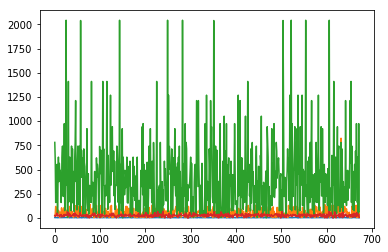

In [153]:
# plotting the original data
df["Rooms"].plot(), df["Age"].plot(), df["Crime_C_average"].plot(), df["travel_min_to_CBD"].plot()

(<matplotlib.axes._subplots.AxesSubplot at 0x12f5112b0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12f5112b0>)

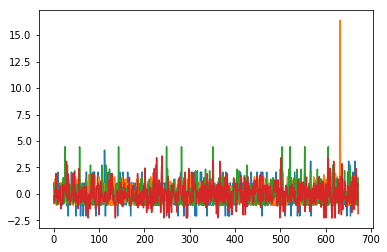

In [154]:
# plotting the scaled data
df["Rooms_scaled"].plot(), df["Age_scaled"].plot(), df["Crime_C_average_scaled"].plot(), df["travel_CBD_scaled"].plot()

(<matplotlib.axes._subplots.AxesSubplot at 0x12f5fc860>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12f5fc860>)

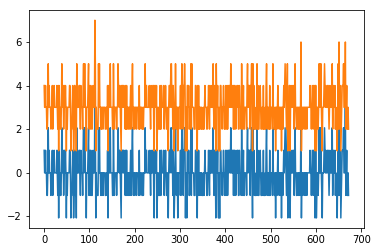

In [155]:
# looking upclose room scaled vs original room
df["Rooms_scaled"].plot(), df["Rooms"].plot()

In [156]:
df.iloc[0]

Rooms                       4.000000
Crime_C_average           780.000000
travel_min_to_CBD          24.500000
Age                        22.000000
Rooms_scaled                1.022980
Crime_C_average_scaled      1.002212
travel_CBD_scaled          -0.179240
Age_scaled                 -0.674239
Name: 0, dtype: float64

In [157]:


independent = df.iloc[:,1:8]   #rest all variable 
dependent = df.iloc[:,0]   #Room
X = independent
y = dependent

# model using linear regression
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

In [158]:
# getting model summary for analysis
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rooms   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.609e+29
Date:                Wed, 12 Jun 2019   Prob (F-statistic):               0.00
Time:                        22:34:00   Log-Likelihood:                 20451.
No. Observations:                 673   AIC:                        -4.089e+04
Df Residuals:                     668   BIC:                        -4.087e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Crime_C_average            0.0012   1.53e-18   7.91e+14      0.000       0.001       0.001
travel_min_to_CBD          0.0752   3.14e-17   2.39e+15      0.000       0.075       0.075
Age                        0.0095   1.13e-17   8.42e+14      0.000       0.010       0.010
Rooms_scaled               0.9659    6.2e-16   1.56e+15      0.000       0.966       0.966
Crime_C_average_scaled    -0.4425   2.78e-16  -1.59e+15      0.000      -0.442      -0.442
travel_CBD_scaled         -0.8814   5.58e-16  -1.58e+15      0.000      -0.881      -0.881
Age_scaled                -0.4471   2.81e-16  -1.59e+15      0.000      -0.447      -0.447
==============================================================================
Omnibus:                      106.977   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              575.301
Skew:                           0.580   Prob(JB):                    1.19e-125
Kurtosis:                       7.379   Cond. No.                     2.79e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.65e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## 3. MinMaX Normalisation

In this section, we discuss a different type of normalization for reshaping the range of data. We process the same data we used in the previous section. We can implement this either Scikit-Learn or manually.

In [159]:
minmax_scale = preprocessing.MinMaxScaler().fit(df[['Rooms','Crime_C_average','travel_min_to_CBD','Age']])
df_minmax = minmax_scale.transform(df[['Rooms','Crime_C_average','travel_min_to_CBD','Age']])
df_minmax[0:5]

array([[0.5       , 0.38167565, 0.35679612, 0.02436054],
       [0.33333333, 0.2866242 , 0.23071027, 0.04750305],
       [0.33333333, 0.07741303, 0.25339806, 0.14250914],
       [0.5       , 0.16511514, 0.45307443, 0.0816078 ],
       [0.33333333, 0.15825576, 0.43117198, 0.06942753]])

In [160]:
# adding minmax scaled value to dataframe
df['Rooms_minmax'] = df_minmax[:,0] 
df['Crime_C_minmax'] = df_minmax[:,1] 
df['travel_CBD_minmax'] = df_minmax[:,2] 
df['Age_minmax'] = df_minmax[:,3]
df.head()

/Users/ngjadekuan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/ngjadekuan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/ngjadekuan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

,Rooms,Crime_C_average,travel_min_to_CBD,Age,Rooms_scaled,Crime_C_average_scaled,travel_CBD_scaled,Age_scaled,Rooms_minmax,Crime_C_minmax,travel_CBD_minmax,Age_minmax
0,4,780,24.500000,22.0,1.022980,1.002212,-0.179240,-0.674239,0.500000,0.381676,0.356796,0.024361
1,3,586,15.842105,41.0,-0.012307,0.471629,-0.917871,-0.269075,0.333333,0.286624,0.230710,0.047503
2,3,159,17.400000,119.0,-0.012307,-0.696201,-0.784962,1.394232,0.333333,0.077413,0.253398,0.142509
3,4,338,31.111111,69.0,1.022980,-0.206642,0.384774,0.328010,0.500000,0.165115,0.453074,0.081608
4,3,324,29.607143,59.0,-0.012307,-0.244932,0.256466,0.114765,0.333333,0.158256,0.431172,0.069428


In [161]:
# manually calculating maximum and minimum values of rooms, age, travel time and crime C average 
minRoom = df.Rooms.min()
maxRoom = df.Rooms.max()

minAge = df.Age.min()
maxAge = df.Age.max()

minTravel = df.travel_min_to_CBD.min()
maxTravel = df.travel_min_to_CBD.max()

minCrimeC = df.Crime_C_average.min()
maxCrimeC = df.Crime_C_average.max()

In [162]:
# manually checking first value
a = df.Rooms[0] # the first value, for practice
mma = (a - minRoom) / (maxRoom - minRoom)
mma

0.5

In [163]:
df_minmax[0][0]

0.5

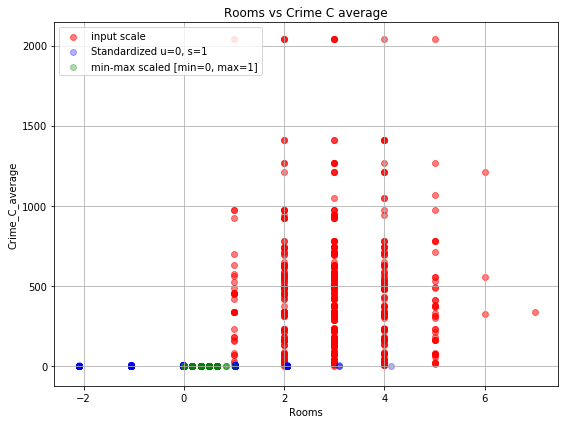

In [164]:
# and plot
%matplotlib inline


def plot():
    f = plt.figure(figsize=(8,6))
    plt.scatter(df['Rooms'],df['Crime_C_average'],label='input scale', alpha=0.5,c="red", marker='o')

    plt.scatter(df_std[:,0], df_std[:,1],c="blue",label='Standardized u=0, s=1', alpha=0.3) 
    
    plt.scatter(df_minmax[:,0], df_minmax[:,1],color="green", label='min-max scaled [min=0, max=1]', alpha=0.3)


    plt.title('Rooms vs Crime C average')
    plt.xlabel('Rooms')
    plt.ylabel('Crime_C_average')
    plt.legend(loc='upper left')
    plt.grid()
    plt.tight_layout()


plot()
plt.show()

In [165]:
df.iloc[0]

Rooms                       4.000000
Crime_C_average           780.000000
travel_min_to_CBD          24.500000
Age                        22.000000
Rooms_scaled                1.022980
Crime_C_average_scaled      1.002212
travel_CBD_scaled          -0.179240
Age_scaled                 -0.674239
Rooms_minmax                0.500000
Crime_C_minmax              0.381676
travel_CBD_minmax           0.356796
Age_minmax                  0.024361
Name: 0, dtype: float64

In [166]:
# building a model assuming room as a dependent variable with other variables independent

independent = df.iloc[:,1:]   #rest all variable 
dependent = df.iloc[:,0]   #Room
X = independent
y = dependent

# modelling using linear regression
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

#model summary for analysis
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rooms   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.160e+32
Date:                Wed, 12 Jun 2019   Prob (F-statistic):               0.00
Time:                        22:34:18   Log-Likelihood:                 22191.
No. Observations:                 673   AIC:                        -4.437e+04
Df Residuals:                     668   BIC:                        -4.435e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Crime_C_average            0.0012   1.15e-19   1.02e+16      0.000       0.001       0.001
travel_min_to_CBD          0.0729   2.37e-18   3.07e+16      0.000       0.073       0.073
Age                        0.0092   8.55e-19   1.08e+16      0.000       0.009       0.009
Rooms_scaled               0.9216   4.54e-17   2.03e+16      0.000       0.922       0.922
Crime_C_average_scaled    -0.4289   2.06e-17  -2.08e+16      0.000      -0.429      -0.429
travel_CBD_scaled         -0.8544   4.14e-17  -2.07e+16      0.000      -0.854      -0.854
Age_scaled                -0.4334   2.09e-17  -2.08e+16      0.000      -0.433      -0.433
Rooms_minmax               0.2755   1.04e-17   2.64e+16      0.000       0.276       0.276
Crime_C_minmax            -0.0002   8.93e-21  -2.07e+16      0.000      -0.000      -0.000
travel_CBD_minmax          0.0011   3.45e-20   3.07e+16      0.000       0.001       0.001
Age_minmax                -0.0009   4.45e-20  -2.05e+16      0.000      -0.001      -0.001
==============================================================================
Omnibus:                       94.831   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              406.423
Skew:                           0.566   Prob(JB):                     5.58e-89
Kurtosis:                       6.635   Cond. No.                     3.22e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.99e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In the following plot, we will zoom in into the four different axis-scales while displaying room values

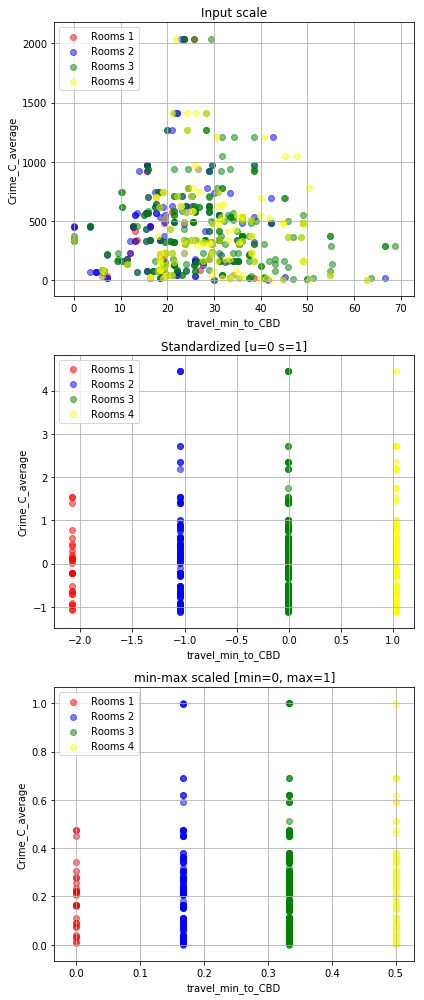

In [167]:
fig, ax = plt.subplots(3, figsize=(6,14))

for a,d,l in zip(range(len(ax)),
               (df[['travel_min_to_CBD', 'Crime_C_average']].values, df_std, df_minmax),
               ('Input scale',
                'Standardized [u=0 s=1]',
                'min-max scaled [min=0, max=1]')
                ):
    for i,c in zip(range(1,5), ('red', 'blue', 'green','yellow')):
        ax[a].scatter(d[df['Rooms'].values == i, 0],
                  d[df['Rooms'].values == i, 1],
                  alpha=0.5,
                  color=c,
                  label='Rooms %s' %i
                  )
    ax[a].set_title(l)
    ax[a].set_xlabel('travel_min_to_CBD')
    ax[a].set_ylabel('Crime_C_average')
    ax[a].legend(loc='upper left')
    ax[a].grid()

plt.tight_layout()

plt.show()

## 4. Data Transformation:

Another way to reshape data is to perform data transformation

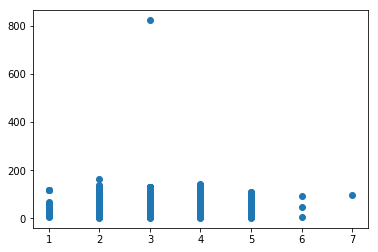

In [168]:
plt.scatter(df['Rooms'], df['Age']) # before

Here I am going to compare the following three kinds of transformations

1.Root transformation

2.Square power transformation

3.Log transformation

The implementation of Root transformation is given as follows.

### 3.1 Root transformation:

In [169]:
df['sqrt_Rooms'] = None
df['sqrt_travel'] = None
df['sqrt_crime'] = None
df['sqrt_age'] = None

i = 0
# computing square root and adding to dataframe of each column
for row in df.iterrows():
    df['sqrt_Rooms'].at[i] = math.sqrt(df['Rooms'][i])
    df['sqrt_age'].at[i] = math.sqrt(df['Age'][i])
    df['sqrt_crime'].at[i] = math.sqrt(df['Crime_C_average'][i])
    df['sqrt_travel'].at[i] = math.sqrt(df['travel_min_to_CBD'][i])
    
    i += 1

df.head()

/Users/ngjadekuan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/ngjadekuan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/ngjadekuan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

,Rooms,Crime_C_average,travel_min_to_CBD,Age,Rooms_scaled,Crime_C_average_scaled,travel_CBD_scaled,Age_scaled,Rooms_minmax,Crime_C_minmax,travel_CBD_minmax,Age_minmax,sqrt_Rooms,sqrt_travel,sqrt_crime,sqrt_age
0,4,780,24.500000,22.0,1.022980,1.002212,-0.179240,-0.674239,0.500000,0.381676,0.356796,0.024361,2,4.94975,27.9285,4.69042
1,3,586,15.842105,41.0,-0.012307,0.471629,-0.917871,-0.269075,0.333333,0.286624,0.230710,0.047503,1.73205,3.98021,24.2074,6.40312
2,3,159,17.400000,119.0,-0.012307,-0.696201,-0.784962,1.394232,0.333333,0.077413,0.253398,0.142509,1.73205,4.17133,12.6095,10.9087
3,4,338,31.111111,69.0,1.022980,-0.206642,0.384774,0.328010,0.500000,0.165115,0.453074,0.081608,2,5.57773,18.3848,8.30662
4,3,324,29.607143,59.0,-0.012307,-0.244932,0.256466,0.114765,0.333333,0.158256,0.431172,0.069428,1.73205,5.44124,18,7.68115


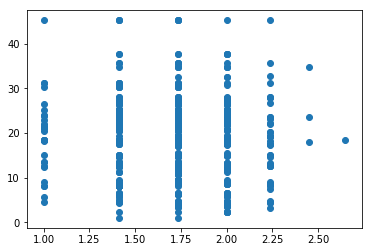

In [170]:
# scatter plot of square root room vs square root crime
plt.scatter(df.sqrt_Rooms, df.sqrt_crime) 

In [171]:
df.iloc[0]

Rooms                             4
Crime_C_average                 780
travel_min_to_CBD              24.5
Age                              22
Rooms_scaled                1.02298
Crime_C_average_scaled      1.00221
travel_CBD_scaled          -0.17924
Age_scaled                -0.674239
Rooms_minmax                    0.5
Crime_C_minmax             0.381676
travel_CBD_minmax          0.356796
Age_minmax                0.0243605
sqrt_Rooms                        2
sqrt_travel                 4.94975
sqrt_crime                  27.9285
sqrt_age                    4.69042
Name: 0, dtype: object

In [172]:
# drop infinite values from square root transformation
df = df.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

# new model based on the sqaure root features
independent = df.iloc[:,-4:] 
dependent = df.iloc[:,0]

X = independent # other square root variables
y = dependent # room


# fitting model to linear regression
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
# getting model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rooms   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.085e+04
Date:                Wed, 12 Jun 2019   Prob (F-statistic):               0.00
Time:                        22:34:43   Log-Likelihood:                -320.65
No. Observations:                 673   AIC:                             649.3
Df Residuals:                     669   BIC:                             667.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqrt_Rooms      2.4495      0.041     59.533      0.000       2.369       2.530
sqrt_travel    -0.1177      0.012    -10.211      0.000      -0.140      -0.095
sqrt_crime     -0.0128      0.002     -7.795      0.000      -0.016      -0.010
sqrt_age       -0.0454      0.005     -8.700      0.000      -0.056      -0.035
==============================================================================
Omnibus:                       41.954   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.053
Skew:                           0.480   Prob(JB):                     1.23e-14
Kurtosis:                       4.168   Cond. No.                         61.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [173]:
# model based on original features
independent = df.iloc[:,1:4]
dependent = df.iloc[:,0]

X = independent
y = dependent

# fitting model on linear regression
model1 = sm.OLS(y, X).fit()
predictions = model1.predict(X)

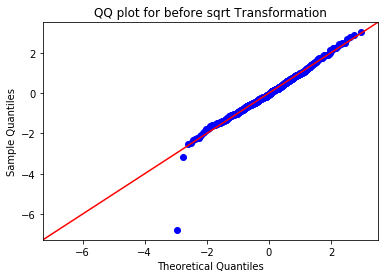

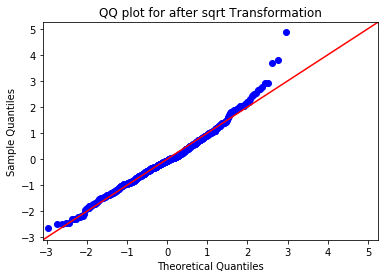

In [174]:
# plotting qq plots for both the models and comparing 
res1 = model1.resid 
fig = sm.qqplot(res1, line='45', fit=True)
plt.title('QQ plot for before sqrt Transformation')
plt.show()

res = model.resid 
fig = sm.qqplot(res, line='45', fit=True)
plt.title('QQ plot for after sqrt Transformation')
plt.show()

From the above plots, we can conclude that no square root transformation is required for the data

### 3.2 Square power transformation:

In [175]:
# computing squared power and adding to dataframe of each column

df['pow_Rooms'] = None
df['pow_travel'] = None
df['pow_crime'] = None
df['pow_age'] = None

i = 0
for row in df.iterrows():
    df['pow_Rooms'].at[i] = math.pow(df['Rooms'][i],2)
    df['pow_age'].at[i] = math.pow(df['Age'][i],2)
    df['pow_crime'].at[i] = math.pow(df['Crime_C_average'][i],2)
    df['pow_travel'].at[i] = math.pow(df['travel_min_to_CBD'][i],2)
    
    i += 1

df.head()

,Rooms,Crime_C_average,travel_min_to_CBD,Age,Rooms_scaled,Crime_C_average_scaled,travel_CBD_scaled,Age_scaled,Rooms_minmax,Crime_C_minmax,travel_CBD_minmax,Age_minmax,sqrt_Rooms,sqrt_travel,sqrt_crime,sqrt_age,pow_Rooms,pow_travel,pow_crime,pow_age
0,4,780,24.500000,22.0,1.022980,1.002212,-0.179240,-0.674239,0.500000,0.381676,0.356796,0.024361,2.000000,4.949747,27.928480,4.690416,16,600.25,608400,484
1,3,586,15.842105,41.0,-0.012307,0.471629,-0.917871,-0.269075,0.333333,0.286624,0.230710,0.047503,1.732051,3.980214,24.207437,6.403124,9,250.972,343396,1681
2,3,159,17.400000,119.0,-0.012307,-0.696201,-0.784962,1.394232,0.333333,0.077413,0.253398,0.142509,1.732051,4.171331,12.609520,10.908712,9,302.76,25281,14161
3,4,338,31.111111,69.0,1.022980,-0.206642,0.384774,0.328010,0.500000,0.165115,0.453074,0.081608,2.000000,5.577734,18.384776,8.306624,16,967.901,114244,4761
4,3,324,29.607143,59.0,-0.012307,-0.244932,0.256466,0.114765,0.333333,0.158256,0.431172,0.069428,1.732051,5.441245,18.000000,7.681146,9,876.583,104976,3481


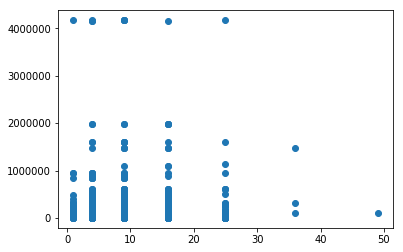

In [176]:
#scatter plot of power rooms versus pow crimes
plt.scatter(df.pow_Rooms, df.pow_crime) 

In [177]:
df.iloc[0]

Rooms                             4
Crime_C_average                 780
travel_min_to_CBD              24.5
Age                              22
Rooms_scaled                1.02298
Crime_C_average_scaled      1.00221
travel_CBD_scaled          -0.17924
Age_scaled                -0.674239
Rooms_minmax                    0.5
Crime_C_minmax             0.381676
travel_CBD_minmax          0.356796
Age_minmax                0.0243605
sqrt_Rooms                        2
sqrt_travel                 4.94975
sqrt_crime                  27.9285
sqrt_age                    4.69042
pow_Rooms                        16
pow_travel                   600.25
pow_crime                    608400
pow_age                         484
Name: 0, dtype: object

In [178]:
# drop infinite values from log transformation
df = df.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

# new model based on the sqaure power features

independent = df.iloc[:,-4:]
dependent = df.iloc[:,0]

X = independent
y = dependent
# fitting model to linear regression
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
# getting model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rooms   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     3158.
Date:                Wed, 12 Jun 2019   Prob (F-statistic):               0.00
Time:                        22:34:55   Log-Likelihood:                -723.86
No. Observations:                 673   AIC:                             1456.
Df Residuals:                     669   BIC:                             1474.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pow_Rooms      0.2200      0.003     64.123      0.000       0.213       0.227
pow_travel     0.0005   3.53e-05     13.289      0.000       0.000       0.001
pow_crime   2.922e-07   4.45e-08      6.569      0.000    2.05e-07     3.8e-07
pow_age      2.85e-06   1.04e-06      2.751      0.006    8.16e-07    4.88e-06
==============================================================================
Omnibus:                      279.848   Durbin-Watson:                   1.561
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1311.853
Skew:                          -1.864   Prob(JB):                    1.36e-285
Kurtosis:                       8.734   Cond. No.                     8.37e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [179]:
# model based on the original features
independent = df.iloc[:,1:4]
dependent = df.iloc[:,0]

X = independent
y = dependent
# fitting model to linear regression
model1 = sm.OLS(y, X).fit()
predictions = model1.predict(X)

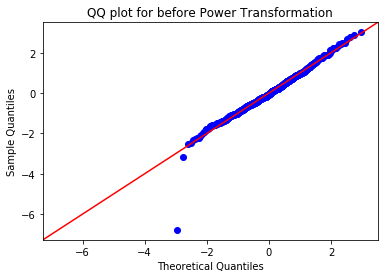

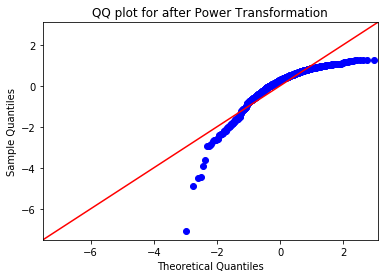

In [180]:
# plotting qq plots for both the models and comparing 

res1 = model1.resid 
fig = sm.qqplot(res1, line='45', fit=True)
plt.title('QQ plot for before Power Transformation')
plt.show()

res = model.resid 
fig = sm.qqplot(res, line='45', fit=True)
plt.title('QQ plot for after Power Transformation')
plt.show()

From the above plots, we can conclude that no squared power transformation is required for the data

### 3.3 Log transformation:

In [181]:
df.iloc[0]

Rooms                          4.000000
Crime_C_average              780.000000
travel_min_to_CBD             24.500000
Age                           22.000000
Rooms_scaled                   1.022980
Crime_C_average_scaled         1.002212
travel_CBD_scaled             -0.179240
Age_scaled                    -0.674239
Rooms_minmax                   0.500000
Crime_C_minmax                 0.381676
travel_CBD_minmax              0.356796
Age_minmax                     0.024361
sqrt_Rooms                     2.000000
sqrt_travel                    4.949747
sqrt_crime                    27.928480
sqrt_age                       4.690416
pow_Rooms                     16.000000
pow_travel                   600.250000
pow_crime                 608400.000000
pow_age                      484.000000
Name: 0, dtype: float64

In [182]:
# computing log values and adding to dataframe of each column

df['log_Rooms'] = None
df['log_travel'] = None
df['log_crime'] = None
df['log_age'] = None

i = 0
for row in df.iterrows():
    df['log_Rooms'].at[i] = math.log(df['Rooms'][i])
    df['log_age'].at[i] = math.log(df['Age'][i])
    df['log_crime'].at[i] = math.log(df['Crime_C_average'][i])
    if df['travel_min_to_CBD'][i]:
        df['log_travel'].at[i] = math.log(df['travel_min_to_CBD'][i])
    else:
        df['log_travel'].at[i]=0

    i += 1

df.head()

,Rooms,Crime_C_average,travel_min_to_CBD,Age,Rooms_scaled,Crime_C_average_scaled,travel_CBD_scaled,Age_scaled,Rooms_minmax,Crime_C_minmax,...,sqrt_crime,sqrt_age,pow_Rooms,pow_travel,pow_crime,pow_age,log_Rooms,log_travel,log_crime,log_age
0,4,780,24.500000,22.0,1.022980,1.002212,-0.179240,-0.674239,0.500000,0.381676,...,27.928480,4.690416,16.0,600.250000,608400.0,484.0,1.38629,3.19867,6.65929,3.09104
1,3,586,15.842105,41.0,-0.012307,0.471629,-0.917871,-0.269075,0.333333,0.286624,...,24.207437,6.403124,9.0,250.972299,343396.0,1681.0,1.09861,2.76267,6.37332,3.71357
2,3,159,17.400000,119.0,-0.012307,-0.696201,-0.784962,1.394232,0.333333,0.077413,...,12.609520,10.908712,9.0,302.760000,25281.0,14161.0,1.09861,2.85647,5.0689,4.77912
3,4,338,31.111111,69.0,1.022980,-0.206642,0.384774,0.328010,0.500000,0.165115,...,18.384776,8.306624,16.0,967.901235,114244.0,4761.0,1.38629,3.43757,5.82305,4.23411
4,3,324,29.607143,59.0,-0.012307,-0.244932,0.256466,0.114765,0.333333,0.158256,...,18.000000,7.681146,9.0,876.582908,104976.0,3481.0,1.09861,3.38802,5.78074,4.07754


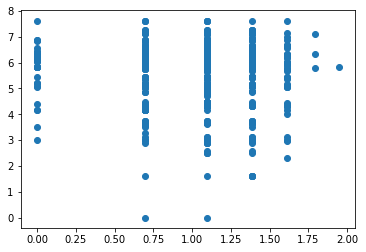

In [183]:
# scatter plot of log rooms versus log crimes
plt.scatter(df.log_Rooms, df.log_crime) # and after

In [184]:
# drop infinite values from log transformation
df = df.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

# new model based on the log transformation features
independent = df.iloc[:,-4:]
dependent = df.iloc[:,0]

X = independent
y = dependent
# fitting into linear regression model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
# model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rooms   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 2.521e+04
Date:                Wed, 12 Jun 2019   Prob (F-statistic):               0.00
Time:                        22:35:04   Log-Likelihood:                -39.948
No. Observations:                 673   AIC:                             87.90
Df Residuals:                     669   BIC:                             105.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
log_Rooms      2.6429      0.029     92.002      0.000       2.586       2.699
log_travel     0.0133      0.013      1.003      0.316      -0.013       0.039
log_crime      0.0263      0.007      3.935      0.000       0.013       0.039
log_age        0.0161      0.009      1.721      0.086      -0.002       0.035
==============================================================================
Omnibus:                      302.229   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1147.151
Skew:                           2.161   Prob(JB):                    7.93e-250
Kurtosis:                       7.714   Cond. No.                         22.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [185]:
df.iloc[0]

Rooms                          4.000000
Crime_C_average              780.000000
travel_min_to_CBD             24.500000
Age                           22.000000
Rooms_scaled                   1.022980
Crime_C_average_scaled         1.002212
travel_CBD_scaled             -0.179240
Age_scaled                    -0.674239
Rooms_minmax                   0.500000
Crime_C_minmax                 0.381676
travel_CBD_minmax              0.356796
Age_minmax                     0.024361
sqrt_Rooms                     2.000000
sqrt_travel                    4.949747
sqrt_crime                    27.928480
sqrt_age                       4.690416
pow_Rooms                     16.000000
pow_travel                   600.250000
pow_crime                 608400.000000
pow_age                      484.000000
log_Rooms                      1.386294
log_travel                     3.198673
log_crime                      6.659294
log_age                        3.091042
Name: 0, dtype: float64

In [186]:
independent = df.iloc[:,1:4]
dependent = df.iloc[:,0]
# model based on the original features
X = independent
y = dependent
# fitting a linear regression model
model1 = sm.OLS(y, X).fit()
predictions = model1.predict(X)

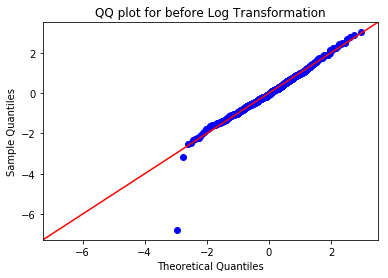

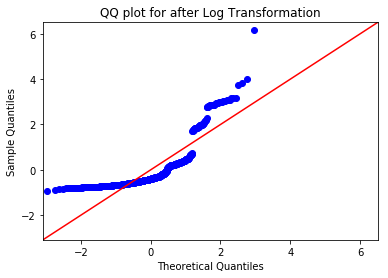

In [187]:
# qq plots for comparing both the models
res1 = model1.resid 
fig = sm.qqplot(res1, line='45', fit=True)
plt.title('QQ plot for before Log Transformation')
plt.show()

res = model.resid 
fig = sm.qqplot(res, line='45', fit=True)
plt.title('QQ plot for after Log Transformation')
plt.show()

From the above plots, we can conclude that no log transformation is required for the data

## Conclusion

From the above analysis , we can conclude that the original data is sufficient to build an effective linear model with standardised transformation for normality. 
No other normalization techniques are necassary to linearise the model.